# Đồ án cuối kì môn Lập trình cho Khoa học Dữ liệu - CQ2022/21

## Mục lục
- [I. Thông tin nhóm](#i)
- [II. Thu thập dữ liệu](#ii)
    - [1. Chủ đề](#ii1)
    - [2. Nguồn dữ liệu](#ii2)
    - [3. Quyền sử dụng](#ii3)
    - [4. Cách thu thập](#ii4)
- [III. Khám phá dữ liệu](#iii)
- [IV. Đặt câu hỏi có ý nghĩa và trả lời](#iv)
    - [1. Câu hỏi 1](#iv1)
    - [2. Câu hỏi 2](#iv2)
    - [3. Câu hỏi 3](#iv3)
    - [4. Câu hỏi 4](#iv4)
- [V. Nhận xét quá trình làm đồ án](#v)
    - [1. Thành viên 1](#v1)
    - [2. Thành viên 2](#v2)
    - [3. Thành viên 3](#v3)
    - [4. Ý kiến nhóm](#v4)
- [Tài liệu tham khảo](#tltk)


## I. Thông tin nhóm <a id="i"></a>

| Họ tên                | MSSV              | Công việc | Hoàn thành(%)|
|-----------------------|-------------------|-----------|--------------|
|Nguyễn Tiến Quốc      |   22120300        |           | 100%         |
|Nguyễn Trung Quôc      |   22120301        |           | 100%         |
|Võ Thành Tâm      |   22120324        |           | 100%         |

## II. Thu thập dữ liệu <a id="ii"></a>

### 1. Chủ đề <a id="ii1"></a>
Chủ đề của đồ án lần này là phân tích giá laptop dựa trên các đặc trưng thông số kỹ thuật và các tính năng bổ sung của chúng. Chúng em sẽ khám phá các yếu tố ảnh hưởng đến giá cả và đưa ra kết luận về xu hướng cấu hình của laptop ngày nay.

### 2. Nguồn dữ liệu <a id="ii2"></a>
Dữ liệu về giá cả và thông số kỹ thuật của laptop được Muhammet Varlık thu thập kết hợp từ các trang thương mại điện tử, từ các trang web bán hàng như Amazon, Best Buy, Newegg, và các trang thương hiệu chính thức (Dell, HP, Lenovo).

URL: [Laptop Prices Dataset](https://www.kaggle.com/datasets/muhammetvarl/laptop-price/)

### 3. Quyền sử dụng <a id="ii3"></a>
Mục đích sử dụng được tác giả ghi rõ: Bộ dữ liệu này được sử dụng để phân tích và dự đoán giá laptop dựa trên các đặc trưng kỹ thuật và thương hiệu. Nó hữu ích cho các mục đích như:
- Phân tích thị trường: Hiểu rõ xu hướng giá cả dựa trên các yếu tố kỹ thuật.
- Dự đoán giá: Xây dựng mô hình học máy để dự đoán giá bán của laptop mới.
- So sánh sản phẩm: So sánh các đặc trưng kỹ thuật giữa các dòng laptop khác nhau.

Vì thế, với mục đích duy nhất là sử dụng cho học tập (phi thương mại) nên nhóm có được quyền sử dụng.

### 4. Cách thu thập <a id="ii4"></a>
Dựa trên các phương pháp thu thập dữ liệu phổ biến, có thể dự đoán rằng Muhammet Varlık đã sử dụng một hoặc kết hợp các phương pháp sau để tạo ra bộ dataset "Laptop Price":

- Web Scraping từ các trang bán hàng trực tuyến
- Sử dụng API của các nền tảng bán hàng: Nếu có, tác giả có thể đã sử dụng API của các nền tảng bán hàng để truy xuất dữ liệu một cách chính xác và có cấu trúc rõ ràng hơn.
- Thu thập thông tin từ các trang so sánh giá: Các trang như PriceGrabber, Google Shopping cũng là nguồn dữ liệu tiềm năng để thu thập thông tin về giá cả từ nhiều cửa hàng khác nhau.


## III. Khám phá dữ liệu  <a id="iii"></a>

### 1. <a id="iii1"></a>

In [1]:
# import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re

In [2]:
df = pd.read_csv("./Dataset/laptop_price.csv", encoding='ISO-8859-1')
df.sample(n=5)

,laptop_ID,Company,Product,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price_euros
732,740,HP,15-BW091ND (A9-9420/6GB/1TB,Notebook,15.6,Full HD 1920x1080,AMD A9-Series A9-9420 3GHz,6GB,128GB SSD + 1TB HDD,AMD Radeon 520,Windows 10,2.1kg,650.0
1069,1084,Apple,"MacBook 12""",Ultrabook,12.0,IPS Panel Retina Display 2304x1440,Intel Core M 1.1GHz,8GB,256GB Flash Storage,Intel HD Graphics 515,Mac OS X,0.920kg,1300.0
894,905,MSI,GS73VR Stealth,Gaming,17.3,IPS Panel 4K Ultra HD 3840x2160,Intel Core i7 6700HQ 2.6GHz,16GB,512GB SSD + 2TB HDD,Nvidia GeForce GTX 1060,Windows 10,2.43kg,2649.0
462,469,Asus,Pro P2540UA-AB51,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,1TB HDD,Intel HD Graphics 620,Windows 10,2.37kg,749.0
1126,1141,Lenovo,Yoga Book,2 in 1 Convertible,10.1,IPS Panel Touchscreen 1920x1200,Intel Atom x5-Z8550 1.44GHz,4GB,64GB Flash Storage,Intel HD Graphics 400,Windows 10,0.69kg,479.0


### 2. Thông tin cơ bản <a id="iii2"></a>

### 2.1. Bộ dữ liệu có tất cả bao nhiêu dòng và cột? <a id="iii2a"></a>

In [3]:
df.shape

(1303, 13)

Bộ dữ liệu có 1303 dòng và 13 cột

### 2.2. Ý nghĩa của mỗi dòng là gì? <a id="iii2b"></a>

Mỗi dòng trong bộ dữ liệu tượng trưng cho 1 mẫu laptop. Với các thông tin như `Nhà sản xuất`, `Thương hiệu`, `Loại`,...

### 2.3. Có bị trùng lặp dữ liệu không? <a id="iii2c"></a>

Nhận thấy được cột `laptop_ID` chỉ là số thứ tự khi tác giả cào dữ liệu. Nên sẽ tiến hành loại bỏ cột `laptop_ID` và tiến hành kiểm tra trùng lặp dữ liệu.

In [4]:
df.drop(inplace=True, columns=['laptop_ID'])

In [5]:
df.duplicated().sum()

28

Có 28 dòng liệu bị trùng lặp nên cũng sẽ tiến hành loại bỏ.

In [6]:
df.drop_duplicates(inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1275 entries, 0 to 1274
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Company           1275 non-null   object 
 1   Product           1275 non-null   object 
 2   TypeName          1275 non-null   object 
 3   Inches            1275 non-null   float64
 4   ScreenResolution  1275 non-null   object 
 5   Cpu               1275 non-null   object 
 6   Ram               1275 non-null   object 
 7   Memory            1275 non-null   object 
 8   Gpu               1275 non-null   object 
 9   OpSys             1275 non-null   object 
 10  Weight            1275 non-null   object 
 11  Price_euros       1275 non-null   float64
dtypes: float64(2), object(10)
memory usage: 129.5+ KB


Bộ dữ liệu chỉ còn 1275 dòng dữ liệu.

### 2.4. Ý nghĩa của mỗi cột là gì? <a id="iii2d"></a>

Company,Product,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price_euros
|Cột|Ý nghĩa|
|--|--|
|Company| Nhà sản xuất|
|Product|Thương hiệu và mẫu mã |
|TypeName|Loại laptop|
|Inches|Kính thước màn hình(inch)|
|ScreenResolution|Độ phân giải màn hình|
|Cpu|CPU|
|Ram|Ram laptop|
|Memory|Bộ nhớ|
|Gpu|Bộ xử lí đồ họa|
|OpSys|Hệ điều hành|
|Weight|Khối lượng|
|Price_euros|Giá (Euro)|

### 2.5. Loại dữ liệu của từng cột là gì? Có phù hợp không? <a id="iii2e"></a>

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1275 entries, 0 to 1274
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Company           1275 non-null   object 
 1   Product           1275 non-null   object 
 2   TypeName          1275 non-null   object 
 3   Inches            1275 non-null   float64
 4   ScreenResolution  1275 non-null   object 
 5   Cpu               1275 non-null   object 
 6   Ram               1275 non-null   object 
 7   Memory            1275 non-null   object 
 8   Gpu               1275 non-null   object 
 9   OpSys             1275 non-null   object 
 10  Weight            1275 non-null   object 
 11  Price_euros       1275 non-null   float64
dtypes: float64(2), object(10)
memory usage: 129.5+ KB


In [8]:
df.isnull().sum()

Company             0
Product             0
TypeName            0
Inches              0
ScreenResolution    0
Cpu                 0
Ram                 0
Memory              0
Gpu                 0
OpSys               0
Weight              0
Price_euros         0
dtype: int64

Tổng quan bộ dữ liệu không có giá trị nào bị thiếu.

Có thể thấy chỉ có 2 cột `Inches` và `Price_euros` là số thực, còn lại đều ở dạng string. Điều này có thể không phù hợp ở 1 số các cột như `Ram`(chỉ tính bằng GB), `Weight`(chỉ tính bằng kg),... Ta sẽ lấy ra các thông tin ở các cột này. 

In [9]:
# Chuyển kích thước màn hình về dạng số nguyên.
df['Inches']= df['Inches'].astype(int)
df['Inches'].value_counts()

15    655
14    194
13    174
17    165
12     50
11     32
10      4
18      1
Name: Inches, dtype: int64

In [10]:
# Ram loại bỏ đơn vị GB
df['Ram']= df['Ram'].str.replace('GB', '')
df['Ram']= df['Ram'].astype('int64')
df['Ram'].value_counts()

8     613
4     367
16    198
6      35
12     25
32     17
2      16
24      3
64      1
Name: Ram, dtype: int64

In [11]:
# ScreenResolution tách thành loại màn hình cũng như kích thước dài và rộng
resolutions= df['ScreenResolution']
df['ScreenResolution']= [x[-1] for x in resolutions.str.split(' ')]
tmp = df['ScreenResolution'].str.split('x')
df['Screen'] = [' '.join(x[:-1]) if len(x[:-1]) > 0 else 'Standard' for x in resolutions.str.split(' ')]

df['ScreenW']= [x[0] for x in tmp]
df['ScreenH']= [x[1] for x in tmp]
df['ScreenW']= df['ScreenW'].astype('int64')
df['ScreenH']= df['ScreenH'].astype('int64')
df.drop(inplace=True, columns=['ScreenResolution'])

# Tiếp tục lấy ra các đặc trưng như Màn cảm ứng, màn hình ISP, màn hình Retina
df['Touchscreen'] = ['Yes' if 'Touchscreen' in x else 'No' for x in df['Screen']]
df['IPSpanel'] = ['Yes' if 'IPS Panel' in x else 'No' for x in df['Screen']]
df['RetinaDisplay'] = ['Yes' if 'Retina Display' in x else 'No' for x in df['Screen']]
df['Screen']= df['Screen'].str.replace('Touchscreen', '')
df['Screen']= df['Screen'].str.replace('IPS Panel', '')
df['Screen']= df['Screen'].str.replace('Retina Display', '')
df['Screen']= df['Screen'].str.replace('/', '')
df['Screen']= df['Screen'].str.strip()
df['Screen']= [x if len(x)>0 else 'Standard' for x in df['Screen']]


df['Screen'].value_counts()

Full HD        835
Standard       369
4K Ultra HD     43
Quad HD+        28
Name: Screen, dtype: int64

In [12]:
#CPU sẽ lấy ra nhà sản xuất CPU, xung nhịp và tên của CPU
tmp = df['Cpu'].str.split(' ')
df['CPU_company']= [x[ 0] for x in tmp]
df['CPU_freq']=    [x[-1] for x in tmp]
df['CPU_freq']= df['CPU_freq'].str.replace('GHz', '')
df['CPU_freq']= df['CPU_freq'].astype('float64')
df['CPU_model']= [' '.join(x[1:-1]) for x in tmp]
df.drop(inplace=True, columns=['Cpu'])

df['CPU_company'].value_counts()

Intel      1214
AMD          60
Samsung       1
Name: CPU_company, dtype: int64

In [13]:
#Storage Space sẽ được tách thành Bộ nhớ chính, Bộ nhớ phụ và loại của bộ nhớ tương ứng
df['Memory']= df['Memory'].str.split('+')
df['PrimaryStorage'] = [x[0] for x in df['Memory']]
df['SecondaryStorage']= [(x[1].strip() if len(x)==2 else '0') for x in df['Memory']]
df.drop(inplace=True, columns=['Memory'])

df['PrimaryStorageType'] = [x[x.find(' '):].strip() for x in df['PrimaryStorage']]
df['PrimaryStorage'] = [x[:x.find(' ')] for x in df['PrimaryStorage']]

df['SecondaryStorage'] = df['SecondaryStorage'].str.split(' ')
df['SecondaryStorageType'] = [(x[1] if len(x)==2 else 'No') for x in df['SecondaryStorage']]
df['SecondaryStorage'] = [x[0] for x in df['SecondaryStorage']]


# Đưa kích thước về đơn vị GB
df['PrimaryStorage'] = [(float(x[:-2])*1024 if 'TB' in x else float(x[:-2])) for x in df['PrimaryStorage']]
tmp = df['SecondaryStorage'].tolist()
for i in range(len(tmp)):
    if 'TB' in tmp[i]:
        tmp[i]= float(tmp[i][:-2])*1024
    elif 'GB' in tmp[i]:
        tmp[i]= float(tmp[i][:-2])
    else:
        tmp[i]= float(tmp[i])
df['SecondaryStorage']= tmp

df['PrimaryStorage'] = df['PrimaryStorage'].astype('int64')
df['SecondaryStorage'] = df['SecondaryStorage'].astype('int64')
print(df['PrimaryStorageType'].value_counts())
print(df['SecondaryStorageType'].value_counts())

SSD              837
HDD              359
Flash Storage     71
Hybrid             8
Name: PrimaryStorageType, dtype: int64
No        1067
HDD        202
SSD          4
Hybrid       2
Name: SecondaryStorageType, dtype: int64


In [14]:
#GPU sẽ được tách thành nhà sản xuất GPU và tên của GPU
tmp = df['Gpu'].str.split(' ')
df['GPU_company'] = [x[0] for x in tmp]
df['GPU_model'] = [' '.join(x[1:]) for x in tmp]
df.drop(inplace=True, columns=['Gpu'])
print(df['GPU_company'].value_counts())
print(df['GPU_model'].value_counts())

Intel     704
Nvidia    396
AMD       174
ARM         1
Name: GPU_company, dtype: int64
HD Graphics 620     279
HD Graphics 520     181
UHD Graphics 620     68
GeForce GTX 1050     66
GeForce GTX 1060     48
                   ... 
Radeon R5 520         1
Radeon R7             1
HD Graphics 540       1
Radeon 540            1
Mali T860 MP4         1
Name: GPU_model, Length: 110, dtype: int64


In [15]:
#Weight (kg) khối lượng sẽ được loại bỏ đơn vị
df['Weight'] = df['Weight'].str.replace('kg', '')
df['Weight'] = df['Weight'].astype('float64')
print(df['Weight'].value_counts())

2.20    120
2.10     58
2.00     45
2.40     42
2.50     38
       ... 
4.50      1
1.14      1
3.80      1
3.25      1
2.34      1
Name: Weight, Length: 171, dtype: int64


In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1275 entries, 0 to 1274
Data columns (total 23 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Company               1275 non-null   object 
 1   Product               1275 non-null   object 
 2   TypeName              1275 non-null   object 
 3   Inches                1275 non-null   int32  
 4   Ram                   1275 non-null   int64  
 5   OpSys                 1275 non-null   object 
 6   Weight                1275 non-null   float64
 7   Price_euros           1275 non-null   float64
 8   Screen                1275 non-null   object 
 9   ScreenW               1275 non-null   int64  
 10  ScreenH               1275 non-null   int64  
 11  Touchscreen           1275 non-null   object 
 12  IPSpanel              1275 non-null   object 
 13  RetinaDisplay         1275 non-null   object 
 14  CPU_company           1275 non-null   object 
 15  CPU_freq             

In [17]:
df.isnull().sum()

Company                 0
Product                 0
TypeName                0
Inches                  0
Ram                     0
OpSys                   0
Weight                  0
Price_euros             0
Screen                  0
ScreenW                 0
ScreenH                 0
Touchscreen             0
IPSpanel                0
RetinaDisplay           0
CPU_company             0
CPU_freq                0
CPU_model               0
PrimaryStorage          0
SecondaryStorage        0
PrimaryStorageType      0
SecondaryStorageType    0
GPU_company             0
GPU_model               0
dtype: int64

Kết quả thu được 23 cột với các thông tin được tách ra rõ ràng hơn. Và bộ dữ liệu khá đầy đủ, không có giá trị thiếu.

### 3. Thông tin chi tiết <a id="iii3"></a>

### 3.1. Với các cột numerical, các giá trị phân bố như thế nào? <a id="iii3a"></a>

In [18]:
cols = ['Weight', 'Price_euros', 'CPU_freq']
numeric_df = pd.DataFrame()

for col in cols:
    numeric_df[col] = df[col].describe()
numeric_df

,Weight,Price_euros,CPU_freq
count,1275.000000,1275.000000,1275.000000
mean,2.040525,1134.969059,2.302980
std,0.669196,700.752504,0.503846
min,0.690000,174.000000,0.900000
25%,1.500000,609.000000,2.000000
50%,2.040000,989.000000,2.500000
75%,2.310000,1496.500000,2.700000
max,4.700000,6099.000000,3.600000


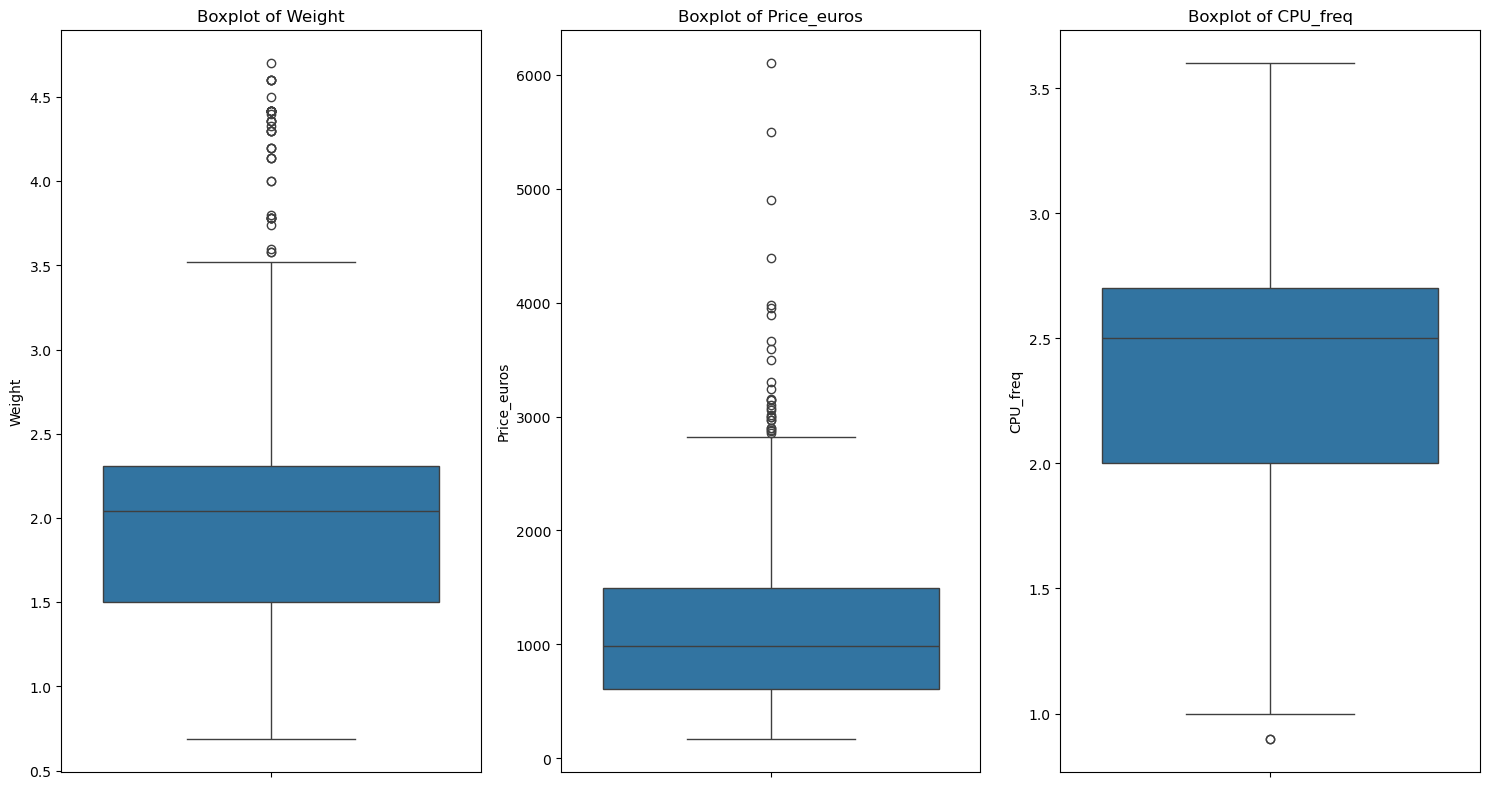

In [19]:
plt.figure(figsize=(15, 8))

for i, col in enumerate(cols, 1):
    plt.subplot(1, len(cols), i) 
    sns.boxplot(y=df[col])
    plt.title(f'Boxplot of {col}')
    plt.ylabel(col)

# Điều chỉnh bố cục
plt.tight_layout()
plt.show()

Có thể thấy các giá trị phân bố hợp lí, một số laptop có khối lượng rất khủng, cũng như giá cũng rất khủng.

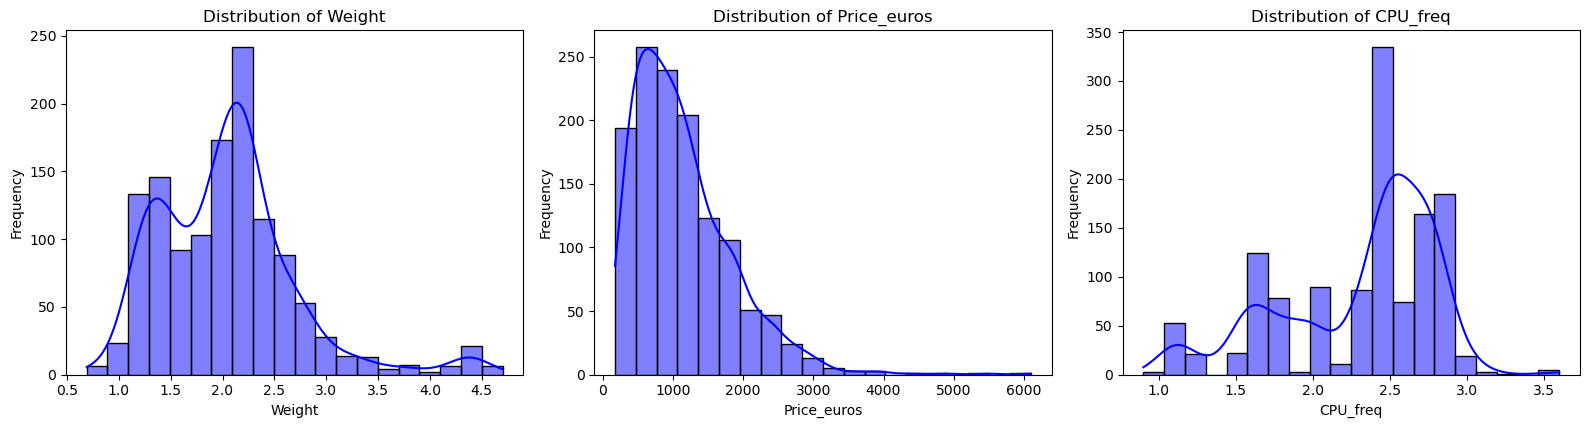

In [20]:
cols = ['Weight', 'Price_euros', 'CPU_freq']
plt.figure(figsize=(16, 12))

for i, column in enumerate(cols, 1):
    plt.subplot(3, 3, i)
    sns.histplot(df[column], kde=True, bins=20, color='blue', edgecolor='black')
    plt.title(f'Distribution of {column}')
    plt.xlabel(column)
    plt.ylabel('Frequency')

# Điều chỉnh bố cục
plt.tight_layout()
plt.show()

- Cột `Weight` là 1 phân phối có 2 đỉnh với 2 đại diện là laptop mỏng nhẹ, và laptop thông thường.
- Cột `Price_euro` có phân phối lệch phải chứng tỏ giá các sản phẩm tập trung ở mức vừa phải, và có 1 số ít các laptop giá trị rất khủng.
- Cột `CPU_freq` có phân phối không đều. Có thể các nhà sản xuất CPU thường tối ưu hóa các mẫu CPU để hoạt động ở một số dải xung nhịp cụ thể, ví dụ 2.0, 2.5,..

### 3.2. Với các cột categorical, các giá trị phân bố như thế nào <a id="iii3b"></a>

Với các cột categorical, ta chia thành 2 phần là dữ liệu dạng số và dạng chuỗi.

Đối với dữ liệu dạng số

        Inches   Ram  PrimaryStorage  SecondaryStorage
count     1275  1275            1275              1275
unique       8     9              13                 6
top         15     8             256                 0
freq       655   613             508              1067


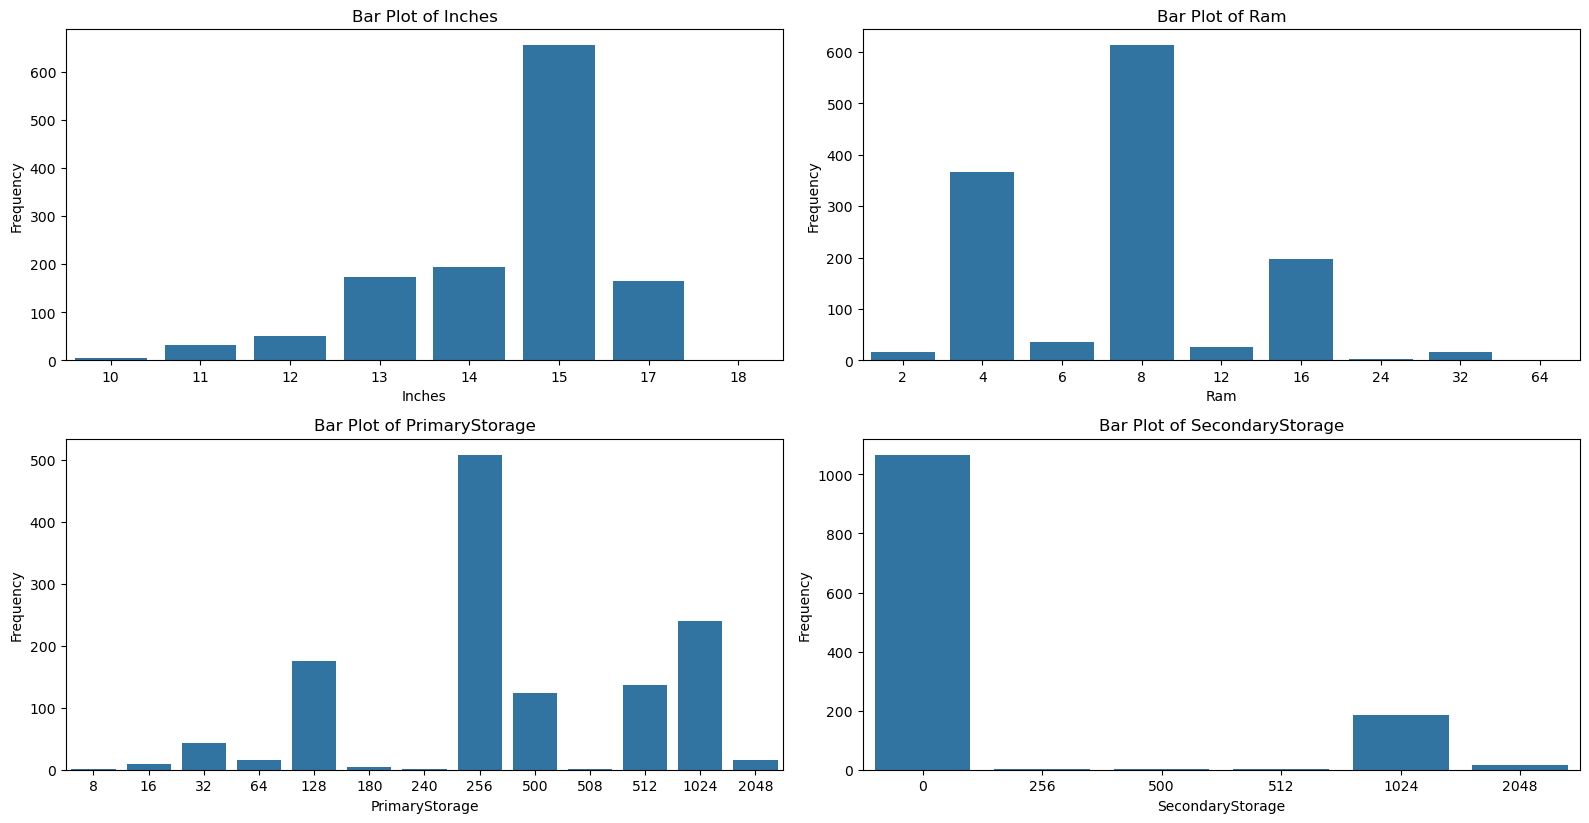

In [21]:
cols = ['Inches', 'Ram','PrimaryStorage', 'SecondaryStorage'] 

df[cols] = df[cols].astype('category')
print(df[cols].describe())

plt.figure(figsize=(16, 12))
for i, col in enumerate(cols, 1):
    plt.subplot((len(cols) + 2) // 2, 2, i)  # Tạo lưới 3 cột
    sns.barplot(
        x=df[col].value_counts().index,  
        y=df[col].value_counts().values, 
    )
    plt.title(f'Bar Plot of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')

# Điều chỉnh bố cục
plt.tight_layout()
plt.show()

Đối với dạng kiểu số ta có 4 cột:
- Kích thước màn hình: Laptop 15 inches có số lượng lớn nhất.(Nhỏ nhất là 10 inches, lớn nhất là 18 inches)
- Ram: Phổ biến nhất là 8GB.(Kích thước Ram nhỏ nhất là 2GB, lớn nhất là 64GB).
- Dung lượng của bộ nhớ chính tập trung nhiều vào 256GB RAM. Dữ liệu có 508GB có vẻ như bất thường nhưng sau khi kiểm tra thì 508 là kích thước của bộ nhớ Hybrid(lai giữa SSD và HDD). 
- Hấu hết các máy chỉ dùng 1 bộ nhớ chính.

Với kích thước bộ nhớ nhỏ như 16GB, 32GB thực tế vẫn có(sau khi tham khảo ở trên Internet). Nhưng kích thước bất thường là 8GB(SSD) quá nhỏ. Ta sẽ kiểm tra xem dữ liệu này có thực tế không.

In [22]:
df[df['PrimaryStorage'] == 8]

,Company,Product,TypeName,Inches,Ram,OpSys,Weight,Price_euros,Screen,ScreenW,...,RetinaDisplay,CPU_company,CPU_freq,CPU_model,PrimaryStorage,SecondaryStorage,PrimaryStorageType,SecondaryStorageType,GPU_company,GPU_model
950,HP,ZBook Studio,Workstation,15,8,Windows 10,2.0,2249.0,Full HD,1920,...,No,Intel,2.7,Core i7 6820HQ,8,0,SSD,No,Nvidia,Quadro M1000M


Dòng dữ liệu này khá vô lí khi sử dụng Ram 8GB nhưng SSD chỉ có 8GB. Sau khi kiểm tra trên Internet thì thực tế không có trường hợp như vậy. Ta sẽ tiến hành loại bỏ dòng dữ liệu này.

In [23]:
df = df[df['PrimaryStorage'] != 8]

Đối với dữ liệu dạng chuỗi.

       Company  TypeName       OpSys   Screen Touchscreen IPSpanel  \
count     1274      1274        1274     1274        1274     1274   
unique      19         6           9        4           2        2   
top       Dell  Notebook  Windows 10  Full HD          No       No   
freq       291       707        1047      834        1086      918   

       RetinaDisplay CPU_company PrimaryStorageType SecondaryStorageType  \
count           1274        1274               1274                 1274   
unique             2           3                  4                    4   
top               No       Intel                SSD                   No   
freq            1257        1213                836                 1066   

       GPU_company  
count         1274  
unique           4  
top          Intel  
freq           704  


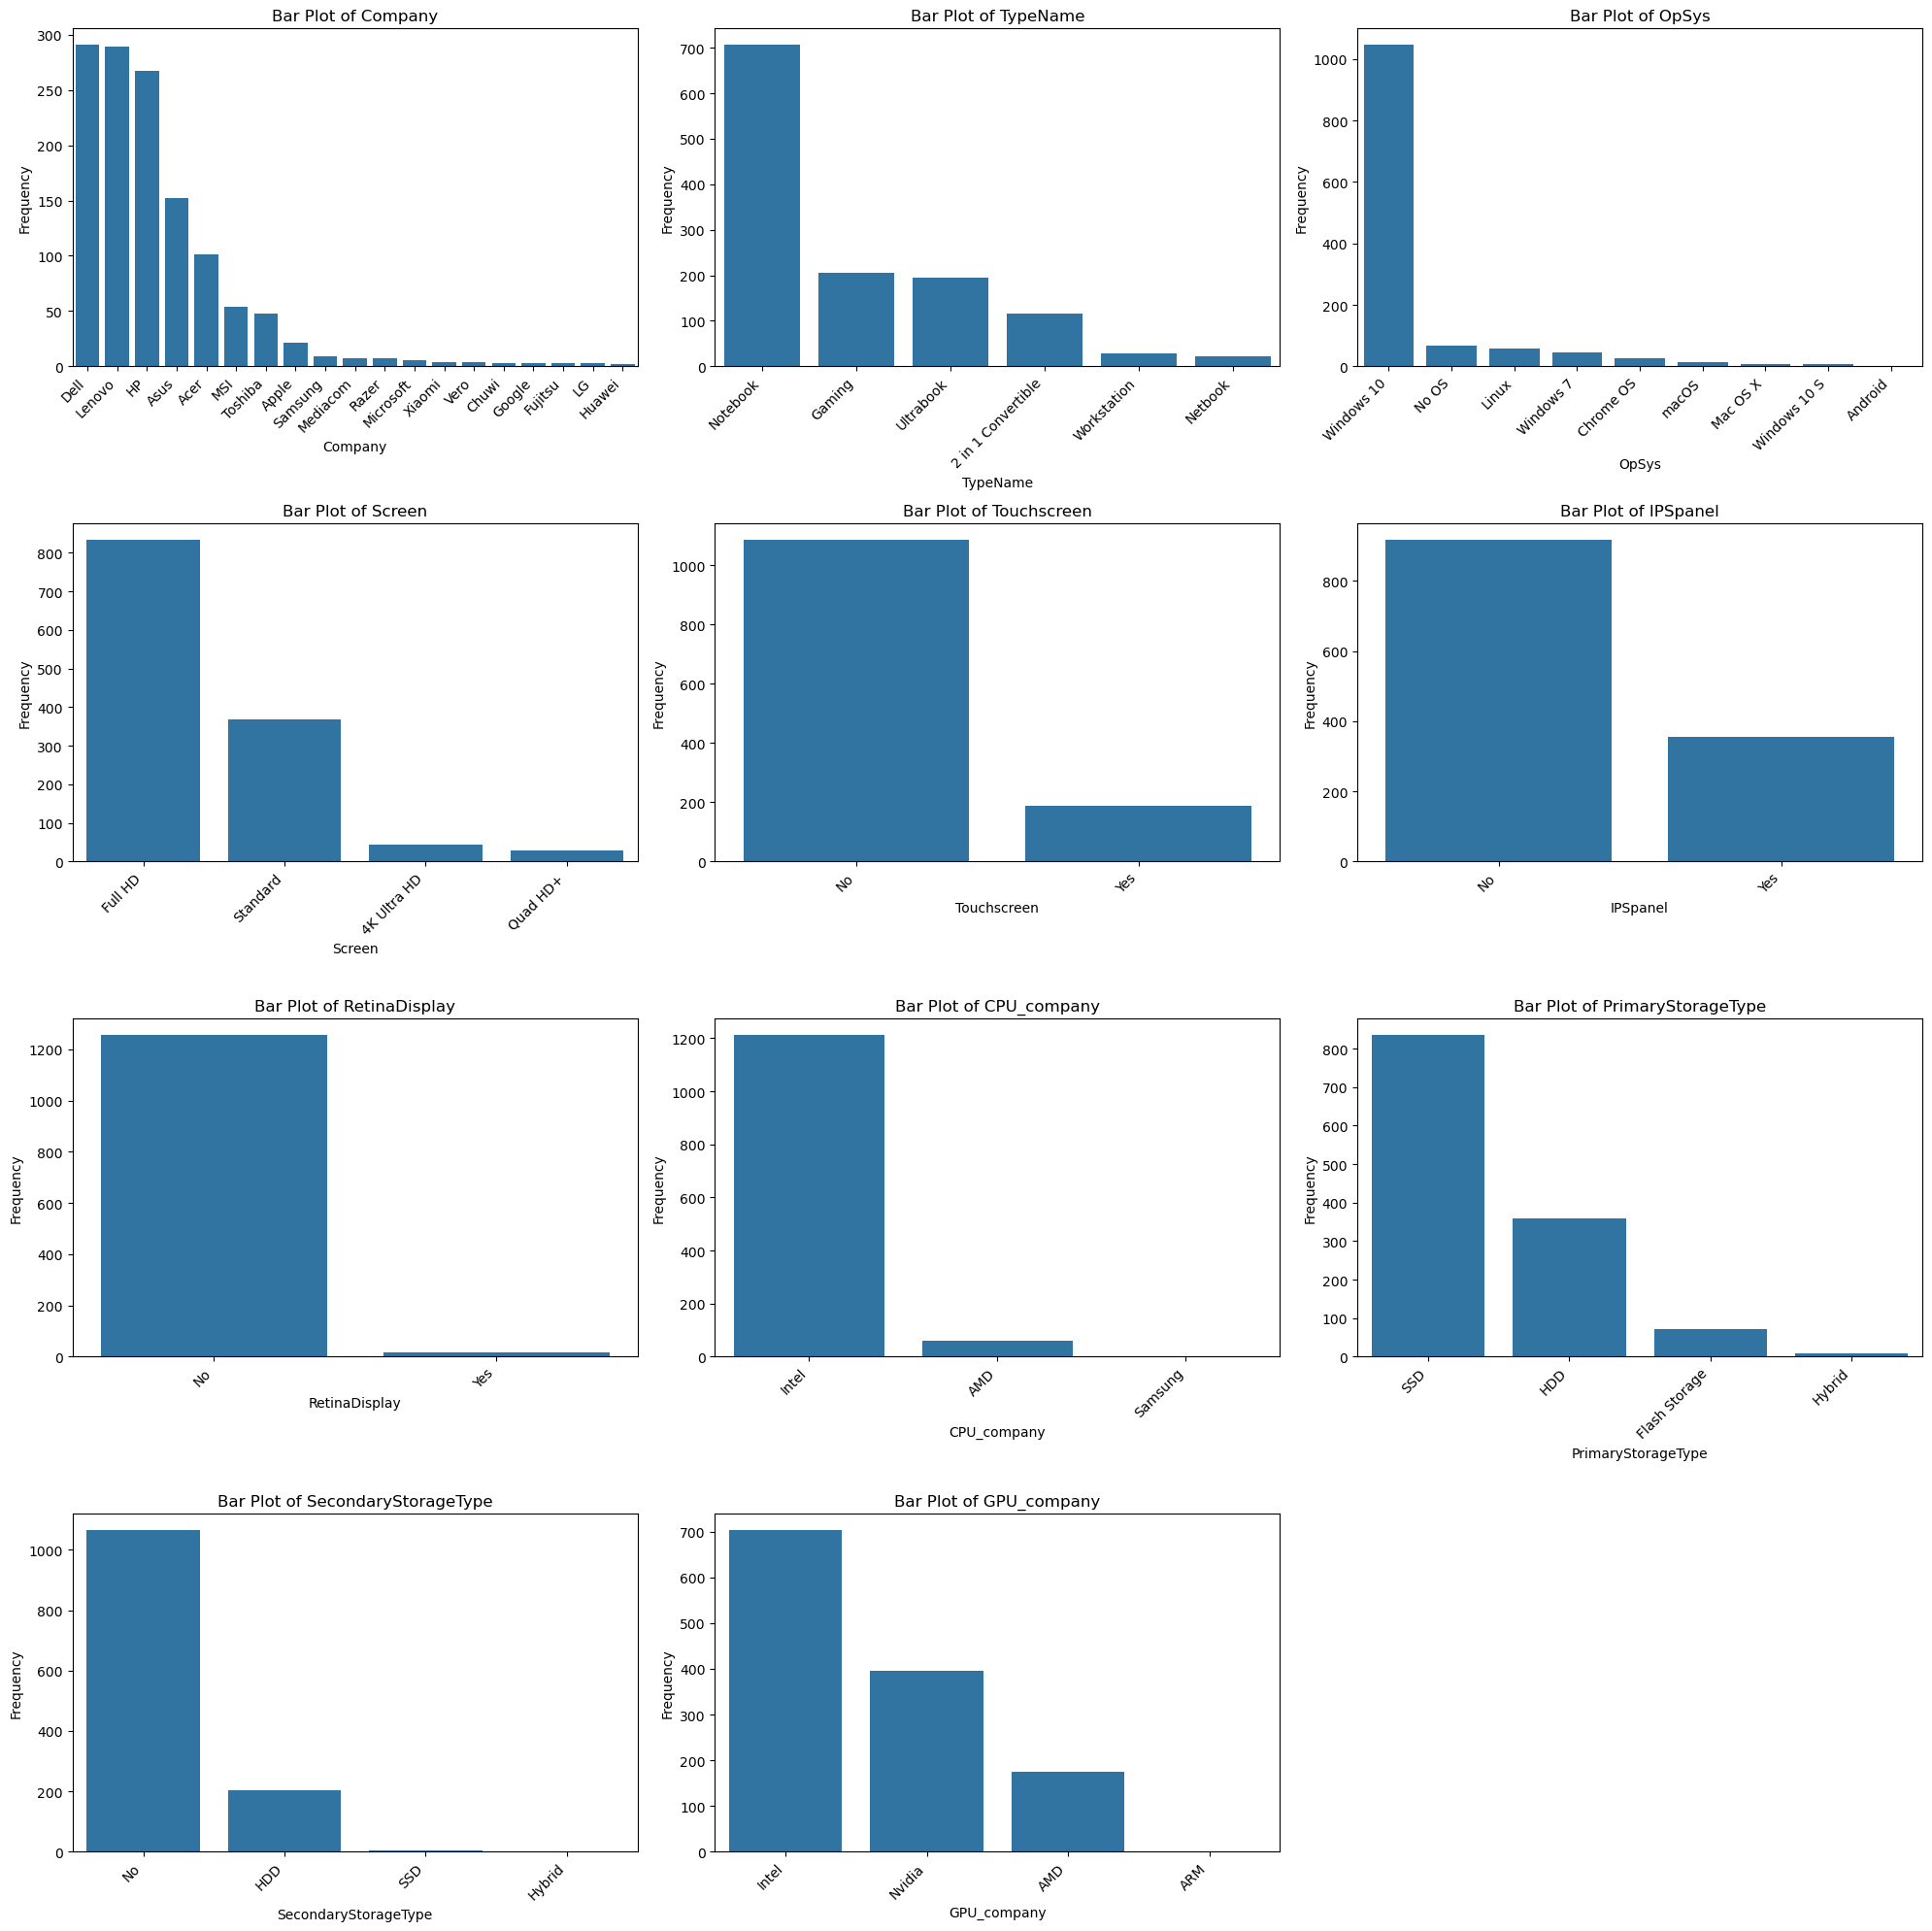

In [24]:
cols = ['Company', 'TypeName', 'OpSys', 'Screen',
        'Touchscreen', 'IPSpanel', 'RetinaDisplay', 'CPU_company', 
        'PrimaryStorageType', 'SecondaryStorageType', 'GPU_company'] 

print(df[cols].describe())

plt.figure(figsize=(20,20))
for i, col in enumerate(cols, 1):
    plt.subplot((len(cols) + 2) // 3, 3, i)  # Tạo lưới 3 cột
    value_counts = df[col].value_counts().sort_values(ascending=False)
    sns.barplot(
        x=value_counts.index,  
        y=value_counts.values, 
    )
    plt.title(f'Bar Plot of {col}')
    plt.xlabel(col)
    plt.xticks(rotation=45, ha="right")
    plt.ylabel('Frequency')

# Điều chỉnh bố cục
plt.tight_layout()
plt.show()

Có thể thấy dữ liệu các cột categorical phân bố hợp lí. Không có điều gì bất thường.

Tên của các sản phẩm, tên model cpu, model gpu đều rất nhiều nên sẽ chỉ hiển thị 10 trong số chúng.

       Product      CPU_model        GPU_model
count     1274           1274             1274
unique     618             93              110
top     XPS 13  Core i5 7200U  HD Graphics 620
freq        30            193              279


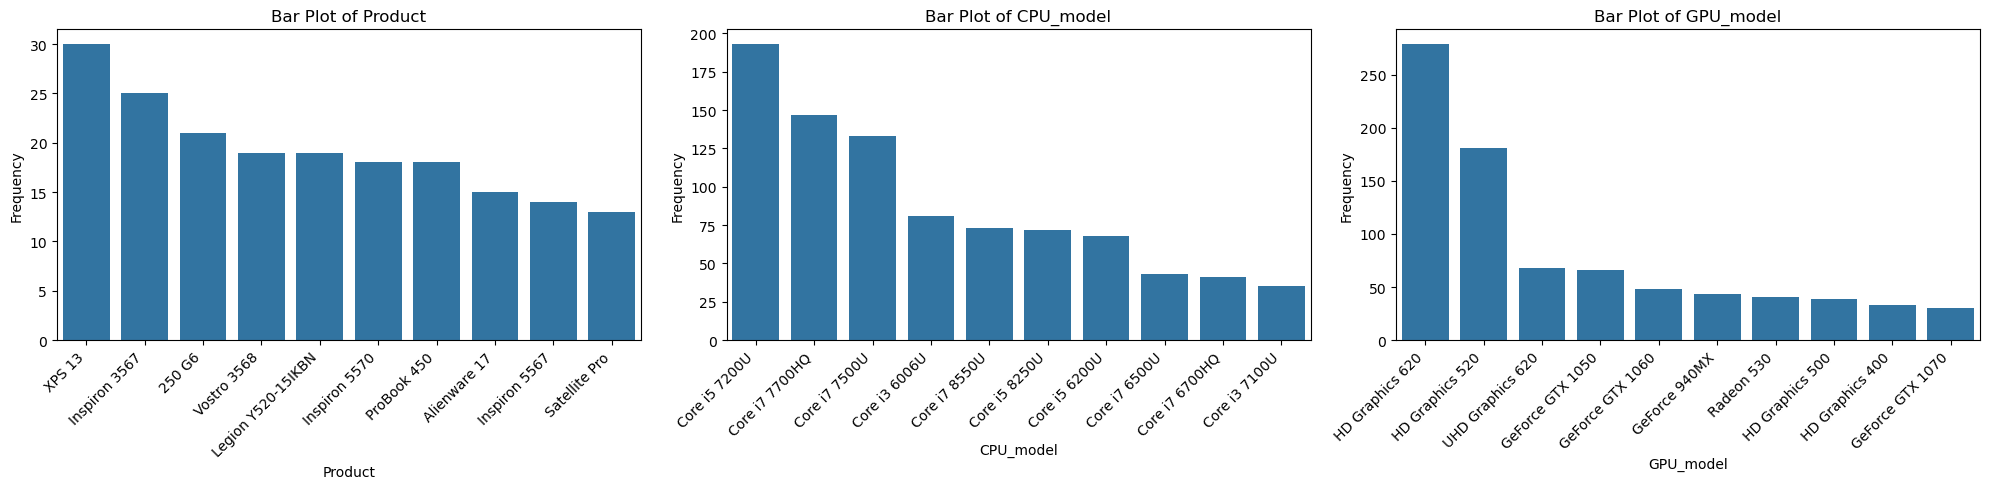

In [25]:
cols = ['Product', 'CPU_model', 'GPU_model'] 

print(df[cols].describe())

plt.figure(figsize=(20,5))
for i, col in enumerate(cols, 1):
    plt.subplot((len(cols) + 2) // 3, 3, i)  # Tạo lưới 3 cột
    sns.barplot(
        x=df[col].value_counts().index[:10],  # Lấy top 10 giá trị phổ biến
        y=df[col].value_counts().values[:10], 
    )
    plt.title(f'Bar Plot of {col}')
    plt.xlabel(col)
    plt.xticks(rotation=45, ha="right")
    plt.ylabel('Frequency')

# Điều chỉnh bố cục
plt.tight_layout()
plt.show()

Dữ liệu không còn gì bất thường.

### 3.3. Kết quả thu được <a id="iii3c"></a>

In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1274 entries, 0 to 1274
Data columns (total 23 columns):
 #   Column                Non-Null Count  Dtype   
---  ------                --------------  -----   
 0   Company               1274 non-null   object  
 1   Product               1274 non-null   object  
 2   TypeName              1274 non-null   object  
 3   Inches                1274 non-null   category
 4   Ram                   1274 non-null   category
 5   OpSys                 1274 non-null   object  
 6   Weight                1274 non-null   float64 
 7   Price_euros           1274 non-null   float64 
 8   Screen                1274 non-null   object  
 9   ScreenW               1274 non-null   int64   
 10  ScreenH               1274 non-null   int64   
 11  Touchscreen           1274 non-null   object  
 12  IPSpanel              1274 non-null   object  
 13  RetinaDisplay         1274 non-null   object  
 14  CPU_company           1274 non-null   object  
 15  CPU_

Ta có bộ dữ liệu với 1274 dòng, 23 cột.

Lưu kết quả vào file `laptop_price_cleaned.csv`

In [27]:
df.to_csv("./Dataset/laptop_price_cleaned.csv", index=False)

## IV. Đặt câu hỏi có ý nghĩa và trả lời  <a id="iv"></a>

### 1. Câu hỏi 1 <a id="iv1"></a>

Mỗi đặc trưng ảnh hưởng tới giá cả của laptop như thế nào? Đặc trưng nào trong số đó ảnh hưởng lớn nhất trong việc định giá laptop?

- Lợi ích khi trả lời câu hỏi: Dưới góc độ các doanh nghiệp, các hãng, ta biết được đặc trưng nào khách hàng coi trọng để điều chỉnh sản phẩm cho phù hợp với nhu cầu thị trường. Giúp hiểu rõ yếu tố nào ảnh hưởng mạnh đến giá cả để định giá sản phẩm hợp lí hơn, mang tính cạnh tranh hơn. Ngoài ra giúp các nhà sản xuất tập trung phát triển các đặc trưng mang lại giá trị cao nhất cho khách hàng.
- Cách xử lí: Ta sẽ nhắm vào các cột chứa thông số kĩ thuật, lập ma trận tương quan của các cột đó với giá cả, sử dụng đường xu hướng cho biểu đồ để biết được các thông số kĩ thuật chất lượng càng cao thì giá thay đổi như nào.

#### a. Tiền xử lý <a id="iv1a"></a>

In [28]:
df.head()

,Company,Product,TypeName,Inches,Ram,OpSys,Weight,Price_euros,Screen,ScreenW,...,RetinaDisplay,CPU_company,CPU_freq,CPU_model,PrimaryStorage,SecondaryStorage,PrimaryStorageType,SecondaryStorageType,GPU_company,GPU_model
0,Apple,MacBook Pro,Ultrabook,13,8,macOS,1.37,1339.69,Standard,2560,...,Yes,Intel,2.3,Core i5,128,0,SSD,No,Intel,Iris Plus Graphics 640
1,Apple,Macbook Air,Ultrabook,13,8,macOS,1.34,898.94,Standard,1440,...,No,Intel,1.8,Core i5,128,0,Flash Storage,No,Intel,HD Graphics 6000
2,HP,250 G6,Notebook,15,8,No OS,1.86,575.00,Full HD,1920,...,No,Intel,2.5,Core i5 7200U,256,0,SSD,No,Intel,HD Graphics 620
3,Apple,MacBook Pro,Ultrabook,15,16,macOS,1.83,2537.45,Standard,2880,...,Yes,Intel,2.7,Core i7,512,0,SSD,No,AMD,Radeon Pro 455
4,Apple,MacBook Pro,Ultrabook,13,8,macOS,1.37,1803.60,Standard,2560,...,Yes,Intel,3.1,Core i5,256,0,SSD,No,Intel,Iris Plus Graphics 650


In [29]:
# In ra các loại GPU có trong dữ liệu
df['GPU_model'] = df['GPU_model'].str.lower()
gpu = df['GPU_model'].unique()
gpu

array(['iris plus graphics 640', 'hd graphics 6000', 'hd graphics 620',
       'radeon pro 455', 'iris plus graphics 650', 'radeon r5',
       'iris pro graphics', 'geforce mx150', 'uhd graphics 620',
       'hd graphics 520', 'radeon pro 555', 'radeon r5 m430',
       'hd graphics 615', 'radeon pro 560', 'geforce 940mx',
       'hd graphics 400', 'geforce gtx 1050', 'radeon r2', 'radeon 530',
       'geforce 930mx', 'hd graphics', 'hd graphics 500',
       'geforce 930mx ', 'geforce gtx 1060', 'geforce 150mx',
       'iris graphics 540', 'radeon rx 580', 'geforce 920mx',
       'radeon r4 graphics', 'radeon 520', 'geforce gtx 1070',
       'geforce gtx 1050 ti', 'geforce mx130', 'r4 graphics',
       'geforce gtx 940mx', 'radeon rx 560', 'geforce 920m',
       'radeon r7 m445', 'radeon rx 550', 'geforce gtx 1050m',
       'hd graphics 515', 'radeon r5 m420', 'hd graphics 505',
       'gtx 980 sli', 'r17m-m1-70', 'geforce gtx 1080', 'quadro m1200',
       'geforce 920mx ', 'geforce gtx

In [30]:
# In ra các hãng GPU có trong dữ liệu
df['GPU_company'] = df['GPU_company'].str.lower()
gpu = df['GPU_company'].unique()
gpu

array(['intel', 'amd', 'nvidia', 'arm'], dtype=object)

Các Nhóm Phân Loại GPU:

- Intel Graphics: Bao gồm các GPU như iris plus graphics 640, hd graphics 6000, hd graphics 620, iris plus graphics 650, iris pro graphics, uhd graphics 620, hd graphics 520, hd graphics 615, hd graphics 400, hd graphics, hd graphics 500, iris graphics 540, hd graphics 515, hd graphics 505, iris graphics 550, hd graphics 630, hd graphics 510, hd graphics 405, hd graphics 530, graphics 620, hd graphics 540, hd graphics 5300, hd graphics 620.

- Nvidia GeForce High-End: Bao gồm các GPU dòng GeForce cao cấp như geforce gtx 1050, geforce gtx 1060, geforce gtx 1070, geforce gtx 1050 ti, gtx 980 sli, geforce gtx 1080, geforce gtx 980m, geforce gtx 965m, geforce gtx1080, geforce gtx1050 ti, geforce gtx 970m, geforce gtx 1070m, geforce gtx1060, geforce gtx 1050ti, geforce gtx 980.
- Nvidia GeForce Mid/Low-End: Bao gồm các GPU dòng GeForce tầm trung và thấp như geforce mx150, geforce 940mx, geforce 930mx, geforce 930mx, geforce 150mx, geforce 920mx, geforce 920mx, geforce gtx 940mx, geforce 920m, geforce gtx 940mx, geforce 920m, geforce 920mx, geforce gtx 950m, geforce 930m, geforce gtx 940m, geforce gt 940mx, geforce gtx 960m, geforce gtx 960m, geforce gtx 960, geforce 960m, geforce 920, geforce 940m, geforce gtx 930mx, geforce 960m.

- Nvidia Quadro: Bao gồm các GPU dòng Quadro như quadro m1200, quadro m2200m, quadro m620, quadro m620m, quadro m520m, quadro m2200, quadro m2000m, quadro m1000m, quadro 3000m, quadro m500m, quadro m3000m.

- AMD Radeon High-End: Bao gồm các GPU dòng Radeon cao cấp như radeon pro 455, radeon pro 555, radeon pro 560, radeon rx 580, radeon rx 560, radeon rx 550, radeon rx 540, radeon 540.
- AMD Radeon Mid/Low-End: Bao gồm các GPU dòng Radeon tầm trung và thấp như radeon r5, radeon r2, radeon 530, radeon r5 m430, radeon 520, radeon r7 m445, radeon r5 m420, radeon r5 430, radeon r4 graphics, r4 graphics, radeon r4, radeon r7 m460, radeon r5 520, radeon r7 m440, radeon r7, radeon r7 m365x, radeon r9 m385, radeon r5 m330, radeon r5 m315, radeon r7 m360, radeon r5 m420x, radeon r7 graphics, radeon r7 m465, radeon r3.
- AMD FirePro: Bao gồm các GPU dòng FirePro như firepro w4190m, firepro w5130m, firepro w4190m, firepro w6150m.

- ARM Mali: Bao gồm các GPU như mali t860 mp4.

- Other: Bao gồm các GPU không thuộc các nhóm trên hoặc không rõ ràng. (r17m-m1-70)

Phân loại dựa trên: [Phân loại chi tiết card đồ họa](https://hc.com.vn/ords/nnews/card-do-hoa-la-gi)

In [31]:
def extract_gpu_type(gpu_str):
    if pd.isnull(gpu_str):
        return 'Other'
    
    gpu_str_lower = gpu_str.lower()
    
    # Intel Graphics
    intel_keywords = [
        'hd graphics', 'intel iris', 'uhd graphics',
        'iris plus graphics', 'iris pro graphics', 'iris graphics'
    ]
    if any(keyword in gpu_str_lower for keyword in intel_keywords):
        return 'Intel Graphics'
    
    # Nvidia GeForce High-End
    # Dòng GTX 10xx, GTX 16xx, RTX
    geforce_high_end_patterns = [
        r'geforce\s+gtx\s+10\d0',
        r'geforce\s+gtx\s+16\d0',
        r'geforce\s+rtx',
        r'geforce\s+gtx\s+1070m',
        r'geforce\s+gtx\s+1080',
        r'geforce\s+gtx\s+1060',
        r'geforce\s+gtx\s+1050 ti',
        r'geforce\s+gtx\s+1050m',
        r'geforce\s+gtx\s+980',
        r'geforce\s+gtx\s+980m',
        r'geforce\s+gtx\s+970m',
        r'geforce\s+gtx\s+960m',
        r'geforce\s+gtx\s+965m',
        r'geforce\s+gtx\s+1080m'
    ]
    if any(re.search(pattern, gpu_str_lower) for pattern in geforce_high_end_patterns):
        return 'Nvidia GeForce High-End'
    
    # Nvidia GeForce Mid/Low-End
    geforce_mid_low_patterns = [
        r'geforce\s+mx\d{3}',
        r'geforce\s+gt\s+940mx',
        r'geforce\s+gtx\s+930mx',
        r'geforce\s+gtx\s+940m',
        r'geforce\s+gtx\s+950m',
        r'geforce\s+gtx\s+960',
        r'geforce\s+920mx',
        r'geforce\s+920m',
        r'geforce\s+930m',
        r'geforce\s+940m',
        r'geforce\s+920',
        r'geforce\s+930mx',
        r'geforce\s+960m',
        r'geforce\s+940mx',
        r'geforce\s+960'
    ]
    if any(re.search(pattern, gpu_str_lower) for pattern in geforce_mid_low_patterns):
        return 'Nvidia GeForce Mid/Low-End'
    
    # Nvidia Quadro
    if 'quadro' in gpu_str_lower:
        return 'Nvidia Quadro'
    
    # AMD Radeon High-End
    radeon_high_end_patterns = [
        r'radeon\s+rx\s+5\d0',
        r'radeon\s+rx\s+6\d0',
        r'radeon\s+pro\s+455',
        r'radeon\s+pro\s+555',
        r'radeon\s+pro\s+560',
        r'radeon\s+rx\s+580',
        r'radeon\s+rx\s+560',
        r'radeon\s+rx\s+550',
        r'radeon\s+rx\s+540',
        r'radeon\s+540'
    ]
    if any(re.search(pattern, gpu_str_lower) for pattern in radeon_high_end_patterns):
        return 'AMD Radeon High-End'
    
    # AMD Radeon Mid/Low-End
    radeon_mid_low_patterns = [
        r'radeon\s+r5',
        r'radeon\s+r2',
        r'radeon\s+530',
        r'radeon\s+r5\s+m430',
        r'radeon\s+520',
        r'radeon\s+r7\s+m445',
        r'radeon\s+r5\s+m420',
        r'radeon\s+r5\s+430',
        r'radeon\s+r4\s+graphics',
        r'r4\s+graphics',
        r'radeon\s+r4',
        r'radeon\s+r7\s+m460',
        r'radeon\s+r5\s+520',
        r'radeon\s+r7\s+m440',
        r'radeon\s+r7',
        r'radeon\s+r7\s+m365x',
        r'radeon\s+r9\s+m385',
        r'radeon\s+r5\s+m330',
        r'radeon\s+r5\s+m315',
        r'radeon\s+r7\s+m360',
        r'radeon\s+r5\s+m420x',
        r'radeon\s+r7\s+graphics',
        r'radeon\s+r7\s+m465',
        r'radeon\s+r3'
    ]
    if any(re.search(pattern, gpu_str_lower) for pattern in radeon_mid_low_patterns):
        return 'AMD Radeon Mid/Low-End'
    
    # AMD FirePro
    if 'firepro' in gpu_str_lower:
        return 'AMD FirePro'
    
    # ARM Mali
    if 'mali' in gpu_str_lower:
        return 'ARM Mali'
    
    # Other
    return 'Other'

# Áp dụng phân loại vào DataFrame
df['GPU_Type'] = df['GPU_model'].apply(extract_gpu_type)
df['GPU_Type'].value_counts()

Intel Graphics                703
Nvidia GeForce High-End       216
AMD Radeon Mid/Low-End        152
Nvidia GeForce Mid/Low-End    142
Nvidia Quadro                  30
AMD Radeon High-End            16
Other                           9
AMD FirePro                     5
ARM Mali                        1
Name: GPU_Type, dtype: int64

Cơ sở để gán điểm số cho từng loại GPU: [Bảng xếp hạng card đồ họa](https://tplab.vn/blogs/chia-se-kien-thuc-hay/bang-xep-hang-card-do-hoa-2023)


1. Nvidia GeForce High-End (Điểm: 4):
- Lý Do: Đây là dòng GPU cao cấp của Nvidia, thường được sử dụng cho gaming, thiết kế đồ họa chuyên sâu, và các ứng dụng yêu cầu hiệu năng cao. Các model như GTX 1070, GTX 1080, RTX Series cung cấp hiệu năng vượt trội.

2. AMD Radeon High-End (Điểm: 4):
- Tương tự như Nvidia GeForce cao cấp, AMD Radeon High-End như RX 5700, RX 6800 cung cấp hiệu năng mạnh mẽ cho gaming và các ứng dụng đồ họa nặng.

3. Nvidia Quadro và AMD FirePro (Điểm: 3):
- Các GPU này được thiết kế chuyên dụng cho công việc đồ họa chuyên sâu, xử lý video, và các ứng dụng CAD/CAM. Chúng cung cấp hiệu năng tốt nhưng không dành cho gaming.

4. Nvidia GeForce Mid/Low-End và AMD Radeon Mid/Low-End (Điểm: 2):
- Các GPU này phù hợp với gaming nhẹ, xử lý đồ họa trung bình và các ứng dụng thông thường. Chúng cung cấp hiệu năng vừa phải với mức giá hợp lý.

5. Intel Graphics (Điểm: 1):
- Đây là GPU tích hợp trong CPU, phù hợp với các tác vụ cơ bản như lướt web, xem video, và công việc văn phòng. Hiệu năng thấp hơn so với các GPU rời.

6. ARM Mali (Điểm: 0.5):
- GPU này thường được sử dụng trong các thiết bị di động như tablet và smartphone. Hiệu năng thấp, không phù hợp với các tác vụ đồ họa nặng.

7. Other (Điểm: 1):
- Bao gồm các GPU không thuộc các nhóm trên hoặc không rõ ràng. Được gán điểm số mặc định là 1.

In [32]:
# Hàm đánh giá điểm số GPU
def gpu_rank(gpu_type):
    gpu_type_lower = gpu_type.lower()
    
    if 'geforce high-end' in gpu_type_lower or 'radeon high-end' in gpu_type_lower:
        return 4  # GPU cao cấp, hiệu năng cao
    elif 'geforce mid/low-end' in gpu_type_lower or 'radeon mid/low-end' in gpu_type_lower:
        return 2  # GPU trung bình/thấp, hiệu năng vừa
    elif 'quadro' in gpu_type_lower or 'firepro' in gpu_type_lower:
        return 3  # GPU chuyên dụng cho công việc đồ họa, hiệu năng tốt
    elif 'intel graphics' in gpu_type_lower:
        return 1  # GPU tích hợp, hiệu năng thấp
    elif 'arm mali' in gpu_type_lower:
        return 0.5  # GPU ARM, thường dùng trong thiết bị di động, hiệu năng thấp
    else:
        return 1  # Default
df['GPU_Rank'] = df['GPU_Type'].apply(gpu_rank)

In [33]:
# In ra các loại CPU có trong dữ liệu
df['CPU_model'] = df['CPU_model'].str.lower()
cpu = df['CPU_model'].unique()
cpu

array(['core i5', 'core i5 7200u', 'core i7', 'a9-series 9420',
       'core i7 8550u', 'core i5 8250u', 'core i3 6006u', 'core m m3',
       'core i7 7500u', 'core i3 7100u', 'atom x5-z8350',
       'core i5 7300hq', 'e-series e2-9000e', 'core i7 8650u',
       'atom x5-z8300', 'e-series e2-6110', 'a6-series 9220',
       'celeron dual core n3350', 'core i3 7130u', 'core i7 7700hq',
       'ryzen 1700', 'pentium quad core n4200', 'atom x5-z8550',
       'celeron dual core n3060', 'fx 9830p', 'core i7 7560u',
       'e-series 6110', 'core i5 6200u', 'core m 6y75', 'core i5 7500u',
       'core i7 6920hq', 'core i5 7y54', 'core i7 7820hk',
       'xeon e3-1505m v6', 'core i7 6500u', 'e-series 9000e',
       'a10-series a10-9620p', 'a6-series a6-9220', 'core i7 6600u',
       'celeron dual core 3205u', 'core i7 7820hq', 'a10-series 9600p',
       'core i7 7600u', 'a8-series 7410', 'celeron dual core 3855u',
       'pentium quad core n3710', 'a12-series 9720p', 'core i5 7300u',
       'ce

Các nhóm phân loại CPU:

Cho Intel: 

[Phân loại Intel](https://www.intel.vn/content/www/vn/vi/ark.html#@Processors)

- intel core i7: bao gồm các cpu như core i7, core i7 8550u, core i7 7500u, core i7 8650u, core i7 7700hq, core i7 7560u, core i7 6500u, core i7 6600u, core i7 7600u, core i7 6820hq, core i7 7y75, core i7 7660u, core i7 6700hq, core i7 6820hk, core i7 6560u, core i7 7820hk, core i7 7820hq
- intel core i5: bao gồm các cpu như core i5, core i5 7200u, core i5 8250u, core i5 7300hq, core i5 6200u, core i5 7500u, core i5 6300u, core i5 7440hq, core i5 7y54, core i5 7y57, core i5 6300hq, core i5 6260u, core i5 7300u, core i5 6440hq
- intel core i3: bao gồm các cpu như core i3, core i3 6006u, core i3 7100u, core i3 7130u, core i3 6100u
- intel core m: bao gồm các cpu như core m m3, core m m3-7y30, core m m3-6y30, core m m7-6y75, core m 6y75, core m 7y30, core m 6y54
- intel xeon: bao gồm các cpu như xeon e3 1505m v6, xeon e3 1535m v6, xeon e3 1535m v5
- intel pentium: bao gồm các cpu như pentium dual core n4200, pentium dual core 4405u, pentium dual core 4405y, pentium quad core n4200, pentium quad core n3710, pentium quad core n3450, pentium quad core n3700
- intel celeron: bao gồm các cpu như celeron dual core n3350, celeron dual core n3060, celeron dual core 3205u, celeron dual core 3855u, celeron quad core n3160, celeron dual core n3050
- intel atom: bao gồm các cpu như atom x5 z8350, atom x5 z8300, atom x5 z8550, atom z8350

Cho Amd: 

[Phân loại Amd](https://www.amd.com/en/products/specifications/processors.html)

- amd ryzen: bao gồm các cpu như ryzen 1700, ryzen 1600
- amd a-series: bao gồm các cpu như a4 series 7210, a6 series 9220, a6 series 7310, a8 series 7410, a9 series 9420, a9 series a9 9420, a9 series 9410, a10 series a10 9620p, a10 series 9600p, a12 series 9720p, a12 series 9700p
- amd e-series: bao gồm các cpu như e2 9000e, e2 6110, e2 9000, e2 7110
- amd fx-series: bao gồm các cpu như fx 8800p, fx 9830p

[Tài liệu về Samsung Cortex](https://www.mouser.vn/c/embedded-solutions/computing/single-board-computers/?core=ARM%20Cortex%20A53%2C%20ARM%20Cortex%20A72&srsltid=AfmBOoqkmUafG8LKM4Inn0Tzj16lLpAZpEBshspxxGZmg9wU-LMk_cTh)
- samsung cortex: bao gồm các cpu như cortex a72&a53
- other: bao gồm các cpu không thuộc các nhóm trên hoặc không rõ ràng

Mục Tiêu:
- Phân loại các loại CPU từ dataset thành các nhóm chính.

In [34]:
def extract_cpu_type(cpu_str):
    if pd.isnull(cpu_str):
        return 'unknown'
    
    cpu_str_lower = cpu_str.lower()
    
    # intel core i7
    if 'core i7' in cpu_str_lower:
        return 'intel core i7'
    # intel core i5
    elif 'core i5' in cpu_str_lower:
        return 'intel core i5'
    # intel core i3
    elif 'core i3' in cpu_str_lower:
        return 'intel core i3'
    # intel core m
    elif 'core m' in cpu_str_lower:
        return 'intel core m'
    # intel xeon
    elif 'xeon' in cpu_str_lower:
        return 'intel xeon'
    # intel pentium
    elif 'pentium' in cpu_str_lower:
        return 'intel pentium'
    # intel celeron
    elif 'celeron' in cpu_str_lower:
        return 'intel celeron'
    # intel atom
    elif 'atom' in cpu_str_lower:
        return 'intel atom'
    # amd ryzen
    elif 'ryzen' in cpu_str_lower:
        return 'amd ryzen'
    # amd a-series
    elif re.search(r'a\d+-series', cpu_str_lower):
        return 'amd a-series'
    # amd e-series
    elif re.search(r'e\d+-series', cpu_str_lower):
        return 'amd e-series'
    # amd fx-series
    elif 'fx' in cpu_str_lower:
        return 'amd fx-series'
    # samsung cortex
    elif 'cortex' in cpu_str_lower:
        return 'samsung cortex'
    else:
        return 'other'
    
df['CPU_Type'] = df['CPU_model'].apply(extract_cpu_type)
df['CPU_Type'].value_counts()

intel core i7     514
intel core i5     423
intel core i3     134
intel celeron      78
amd a-series       45
intel pentium      30
intel core m       17
intel atom         13
other               9
amd ryzen           4
intel xeon          4
amd fx-series       2
samsung cortex      1
Name: CPU_Type, dtype: int64

Chuyển đổi loại CPU thành điểm số

Mục Tiêu:
- Phân loại các loại CPU từ dataset thành các nhóm chính.
- Gán điểm số tương ứng cho mỗi loại CPU để đánh giá hiệu năng.
- Đảm bảo rằng tất cả các loại CPU trong danh sách đều được xử lý một cách hợp lý.

Các Nhóm Phân Loại CPU và Điểm Số Đề Xuất:

| Nhóm CPU                | Điểm Số |
|-------------------------|---------|
| intel core i3           | 1       |
| intel core i5           | 2       |
| intel core i7           | 3       |
| intel xeon              | 4       |
| intel pentium           | 0.6     |
| intel celeron           | 0.3     |
| intel atom              | 0.5     |
| intel core m            | 1       |
| amd a-series            | 1       |
| amd e-series            | 1       |
| amd fx-series           | 1       |
| amd ryzen               | 3       |
| samsung cortex          | 0.5     |
| khác (other)            | 1       |

Điểm số đề xuất dựa vào các cơ sở sau:
- Intel Core M: Dòng CPU này thường được sử dụng trong các thiết bị nhẹ, có hiệu năng vừa phải.
- AMD FirePro: Dòng GPU chuyên dụng của AMD, tương đương với hiệu năng cao hơn so với các dòng A-Series.
- Samsung Cortex: GPU ARM, thường dùng trong các thiết bị di động, hiệu năng thấp hơn so với CPU x86.
- Khác (Other): Các loại CPU không thuộc các nhóm trên hoặc không rõ ràng.

In [35]:
# Hàm đánh giá điểm số CPU
def cpu_rank(cpu_type):
    cpu_type_lower = cpu_type.lower()
    
    if 'intel xeon' in cpu_type_lower:
        return 4
    elif 'intel core i7' in cpu_type_lower:
        return 3
    elif 'intel core i5' in cpu_type_lower:
        return 2
    elif 'intel core i3' in cpu_type_lower:
        return 1
    elif 'intel core m' in cpu_type_lower:
        return 1
    elif 'intel pentium' in cpu_type_lower:
        return 0.6
    elif 'intel atom' in cpu_type_lower:
        return 0.5
    elif 'intel celeron' in cpu_type_lower:
        return 0.3

    elif 'amd ryzen' in cpu_type_lower:
        return 3
    elif 'amd a-series' in cpu_type_lower:
        return 1
    elif 'amd e-series' in cpu_type_lower:
        return 1
    elif 'amd fx-series' in cpu_type_lower:
        return 1

    elif 'samsung cortex' in cpu_type_lower:
        return 0.5
    else:
        return 1  # Default

df['CPU_Rank'] = df['CPU_Type'].apply(cpu_rank)

In [36]:
# Chỉ lấy các thương hiệu chính (số lượng mẫu > 2) -> có thể tùy chỉnh
brand_counts = df['Company'].value_counts()
top_brands = brand_counts[brand_counts > 2].index.tolist()
df_top = df[df['Company'].isin(top_brands)]

df_top.head()

,Company,Product,TypeName,Inches,Ram,OpSys,Weight,Price_euros,Screen,ScreenW,...,PrimaryStorage,SecondaryStorage,PrimaryStorageType,SecondaryStorageType,GPU_company,GPU_model,GPU_Type,GPU_Rank,CPU_Type,CPU_Rank
0,Apple,MacBook Pro,Ultrabook,13,8,macOS,1.37,1339.69,Standard,2560,...,128,0,SSD,No,intel,iris plus graphics 640,Intel Graphics,1.0,intel core i5,2.0
1,Apple,Macbook Air,Ultrabook,13,8,macOS,1.34,898.94,Standard,1440,...,128,0,Flash Storage,No,intel,hd graphics 6000,Intel Graphics,1.0,intel core i5,2.0
2,HP,250 G6,Notebook,15,8,No OS,1.86,575.00,Full HD,1920,...,256,0,SSD,No,intel,hd graphics 620,Intel Graphics,1.0,intel core i5,2.0
3,Apple,MacBook Pro,Ultrabook,15,16,macOS,1.83,2537.45,Standard,2880,...,512,0,SSD,No,amd,radeon pro 455,AMD Radeon High-End,4.0,intel core i7,3.0
4,Apple,MacBook Pro,Ultrabook,13,8,macOS,1.37,1803.60,Standard,2560,...,256,0,SSD,No,intel,iris plus graphics 650,Intel Graphics,1.0,intel core i5,2.0


In [37]:
df.dtypes

Company                   object
Product                   object
TypeName                  object
Inches                  category
Ram                     category
OpSys                     object
Weight                   float64
Price_euros              float64
Screen                    object
ScreenW                    int64
ScreenH                    int64
Touchscreen               object
IPSpanel                  object
RetinaDisplay             object
CPU_company               object
CPU_freq                 float64
CPU_model                 object
PrimaryStorage          category
SecondaryStorage        category
PrimaryStorageType        object
SecondaryStorageType      object
GPU_company               object
GPU_model                 object
GPU_Type                  object
GPU_Rank                 float64
CPU_Type                  object
CPU_Rank                 float64
dtype: object

In [38]:
# Ép kiểu Ram về số nguyên
df['Ram'] = df['Ram'].astype('int64')

# Ép kiểu PrimaryStorage về số nguyên
df['PrimaryStorage'] = df['PrimaryStorage'].astype('int64')
# Ép kiểu SecondaryStorage về số nguyên
df['SecondaryStorage'] = df['SecondaryStorage'].astype('int64')

# Ép kiểu Inches về số nguyên
df['Inches'] = df['Inches'].astype('int64')

#### b. Trực quan hóa <a id="iv1b"></a>

Tìm ra những đặc trưng ảnh hưởng tới giá cả của laptop

| Phân Loại            | Cột Dữ Liệu                                                                                                      |
|----------------------|------------------------------------------------------------------------------------------------------------------|
| Cấu Hình             | Inches, Ram, OS, Weight, Screen, ScreenW, ScreenH, CPU_company, CPU_freq, CPU_model, PrimaryStorage, SecondaryStorage, PrimaryStorageType, SecondaryStorageType, GPU_company, GPU_model |
| Các Tính Năng Bổ Sung | Touchscreen, IPSpanel, RetinaDisplay                                                                             |

Trong cấu hình, chỉ lập biểu đồ tương quen giữa các cột 'Inches', 'Ram', 'Weight', 'ScreenW', 'ScreenH', 'CPU_freq', 'CPU_Rank', 'PrimaryStorage', 'SecondaryStorage', 'GPU_Rank' với 'Price_euros' vì các cột này mang giá trị số 

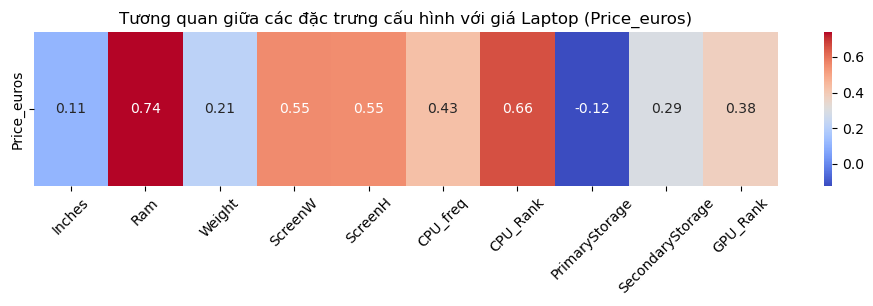

In [39]:
corr_matrix = df[['Inches', 'Ram', 'Weight', 'ScreenW', 'ScreenH', 
                 'CPU_freq', 'CPU_Rank', 'PrimaryStorage', 
                 'SecondaryStorage', 'GPU_Rank', 'Price_euros']].corr()
price_corr = corr_matrix[['Price_euros']].drop('Price_euros')  # Loại bỏ tương quan tự với chính nó
plt.figure(figsize=(12, 2))
sns.heatmap(price_corr.T, annot=True, cmap='coolwarm', cbar=True)
plt.xticks(rotation=45)
plt.title('Tương quan giữa các đặc trưng cấu hình với giá Laptop (Price_euros)')
plt.show()

Nhận xét:

- Inches, Weight, SecondaryStorage: Kích thước màn hình, trọng lượng máy và bộ nhớ lưu trữ phụ có mối tương quan dương nhẹ với giá laptop, nghĩa là các yếu tố này gần như không ảnh hưởng nhiều đến giá cả.
- PrimaryStorage: Dung lượng lưu trữ chính có mối tương quan âm nhẹ với giá laptop.
- Ram: Dung lượng RAM có mối tương quan dương mạnh với giá laptop, dung lượng RAM càng cao hơn giá càng cao.
- ScreenW và ScreenH: Độ phân giải màn hình (chiều rộng và chiều cao) có mối tương quan dương mạnh với giá laptop.
- CPU_freq: Tần số CPU có mối tương quan tương đối với giá laptop, CPU có tần số cao hơn thường có giá cao hơn.
- CPU_Rank: Xếp hạng theo các loại CPU có mối tương quan dương mạnh với giá laptop, CPU cao cấp hơn thường đi kèm giá cao hơn.
- GPU_Rank: Xếp hạng theo các loại GPU có mối tương quan dương đáng kể với giá laptop, GPU đời càng mới giá càng cao.

Nhìn chung, các đặc trưng như RAM, CPU_freq, CPU_Rank, và GPU_Rank, độ phân giải màn hình ảnh hưởng lớn đến giá laptop.

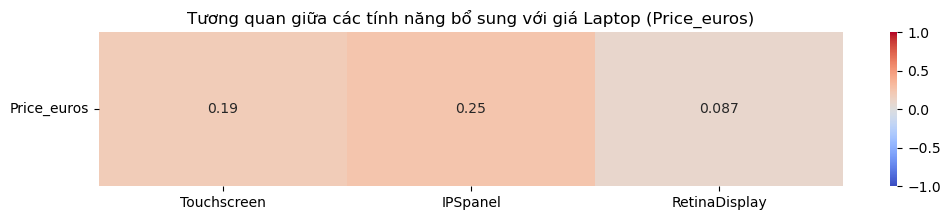

In [40]:
# Chuyển giá trị YES/NO sang 1/0 của 3 cột Touchscreen, IPSpanel, RetinaDisplay
df['Touchscreen'] = df['Touchscreen'].map({'Yes': 1, 'No': 0})
df['IPSpanel'] = df['IPSpanel'].map({'Yes': 1, 'No': 0})
df['RetinaDisplay'] = df['RetinaDisplay'].map({'Yes': 1, 'No': 0})

corr_matrix = df[['Touchscreen', 'IPSpanel', 'RetinaDisplay', 'Price_euros']].corr()
price_corr = corr_matrix[['Price_euros']].drop('Price_euros')
plt.figure(figsize=(12, 2))
sns.heatmap(price_corr.T, annot=True, cmap='coolwarm', cbar=True, vmin=-1, vmax=1)
plt.title('Tương quan giữa các tính năng bổ sung với giá Laptop (Price_euros)')
plt.yticks(rotation=0)
plt.show()

Nhận xét:

- Touchscreen, IPS, và RetinaDisplay tương quan dương yếu với giá laptop. Như vậy đồng nghĩa Các tính năng bổ sung này hầu như không ảnh hưởng nhiều đến giá laptop.

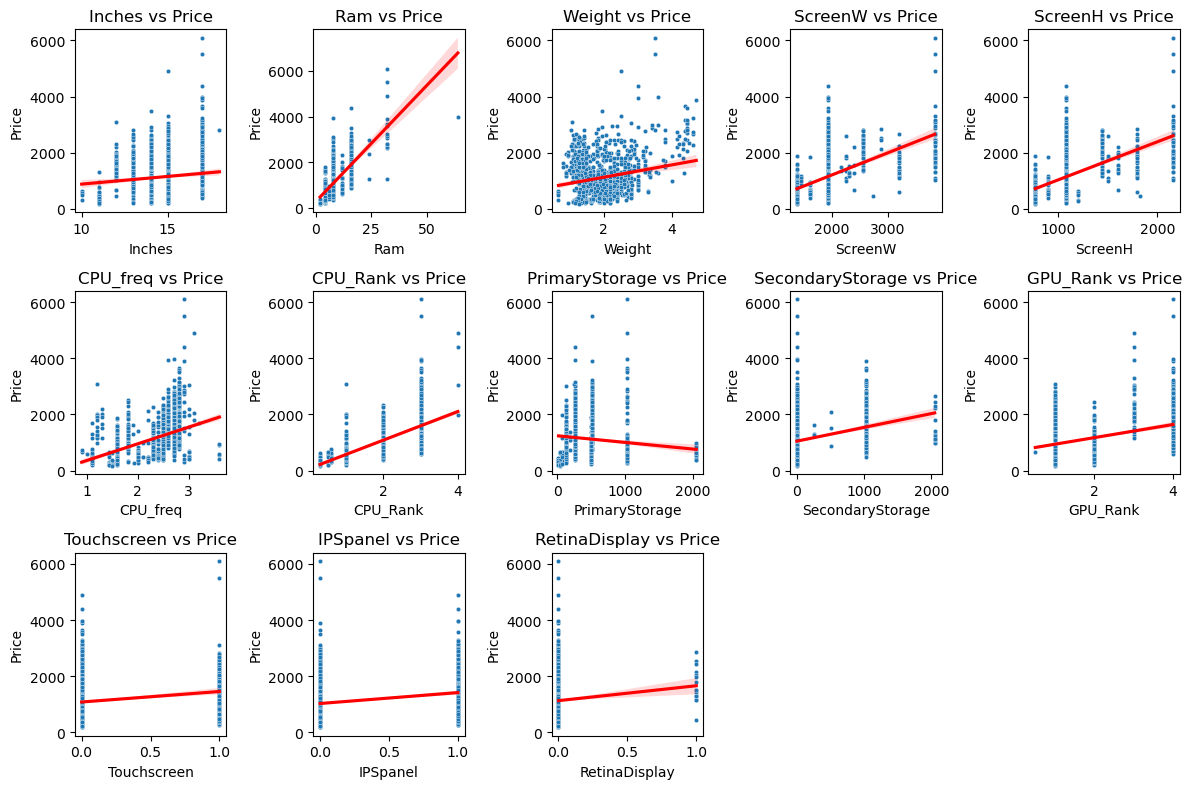

In [41]:
features = ['Inches', 'Ram', 'Weight', 'ScreenW', 'ScreenH', 'CPU_freq', 'CPU_Rank', 'PrimaryStorage', 'SecondaryStorage', 'GPU_Rank', 'Touchscreen', 'IPSpanel', 'RetinaDisplay']
# Scatter plot cho từng đặc trưng với cột Price_euros
plt.figure(figsize=(12, 8))
for i, feature in enumerate(features):
    plt.subplot(3, 5, i + 1)
    sns.scatterplot(data=df, x=feature, y='Price_euros', s=10)
    # thêm đường xu hướng tuyến tính
    sns.regplot(data=df, x=feature, y='Price_euros', scatter=False, color='red')
    plt.title(f'{feature} vs Price')
    plt.xlabel(feature)
    plt.ylabel('Price')
plt.tight_layout()
plt.show()

Nhận xét:

Những đặc trưng có ảnh hưởng rất lớn đến giá:
- RAM: Mối quan hệ tuyến tính rõ ràng. Dung lượng RAM càng cao, giá laptop càng tăng đáng kể.
- CPU_Rank: Các loại CPU có xếp hạng càng cao càng có tác động lớn đến giá. Laptop sử dụng CPU cao cấp sẽ có giá cao hơn rõ rệt.
- GPU_Rank: Tương tự các loại GPU có xếp hạng càng cao càng đóng vai trò quan trọng, đặc biệt trong các laptop phục vụ cho công việc đồ họa hoặc gaming.

Những đặc trưng có ảnh hưởng tương đối:
- CPU_freq: Tần số CPU có ảnh hưởng đến giá nhưng ở mức độ trung bình.
- Weight (Trọng lượng): Laptop nhẹ hơn thường có xu hướng đắt hơn, nhưng mối quan hệ không mạnh và bị phân tán dữ liệu.
- PrimaryStorage và SecondaryStorage: Dung lượng lưu trữ lớn hơn thường làm tăng giá, nhưng không phải yếu tố quyết định.


Những đặc trưng có ảnh hưởng nhẹ hoặc hầu như không ảnh hưởng:
- Inches (Kích thước màn hình), ScreenW và ScreenH (Độ phân giải màn hình): Có ảnh hưởng nhỏ đến giá, thể hiện qua mối quan hệ tuyến tính yếu.
- Touchscreen (Màn hình cảm ứng): Màn hình cảm ứng có tác động rất nhỏ đến giá, chỉ tạo ra sự khác biệt trong một số phân khúc cao cấp.
- IPSpanel (Tấm nền IPS): Tác động nhẹ, chủ yếu ở phân khúc tập trung vào chất lượng hiển thị hình ảnh.
- RetinaDisplay: Ảnh hưởng không đáng kể đến giá, thường xuất hiện trên các sản phẩm của Apple hoặc dòng cao cấp.

In [42]:
# Giá trị cao nhất và thấp nhất theo Company
price_by_company = df.groupby('Company')['Price_euros'].agg(['min', 'max'])
print("Giá cao nhất và thấp nhất theo Company:")
print(price_by_company)

# Giá trị cao nhất và thấp nhất theo CPU_company
price_by_cpu = df.groupby('CPU_company')['Price_euros'].agg(['min', 'max'])
print("\nGiá cao nhất và thấp nhất theo CPU_company:")
print(price_by_cpu)

# Giá trị cao nhất và thấp nhất theo GPU_company
price_by_gpu = df.groupby('GPU_company')['Price_euros'].agg(['min', 'max'])
print("\nGiá cao nhất và thấp nhất theo GPU_company:")
print(price_by_gpu)

Giá cao nhất và thấp nhất theo Company:
               min      max
Company                    
Acer        174.00  2599.00
Apple       898.94  2858.00
Asus        191.90  3975.00
Chuwi       244.99   449.00
Dell        274.90  3659.40
Fujitsu     649.00   799.00
Google     1275.00  2199.00
HP          209.00  4389.00
Huawei     1349.00  1499.00
LG         1899.00  2299.00
Lenovo      229.00  4899.00
MSI         839.00  2799.00
Mediacom    239.00   389.00
Microsoft   989.00  2589.00
Razer      1029.00  6099.00
Samsung     269.00  1849.00
Toshiba     447.00  2799.00
Vero        196.00   260.00
Xiaomi      935.00  1399.95

Giá cao nhất và thấp nhất theo CPU_company:
               min     max
CPU_company               
AMD          199.0  2199.0
Intel        174.0  6099.0
Samsung      659.0   659.0

Giá cao nhất và thấp nhất theo GPU_company:
               min     max
GPU_company               
amd          199.0  2899.0
arm          659.0   659.0
intel        174.0  3100.0
nvidia      

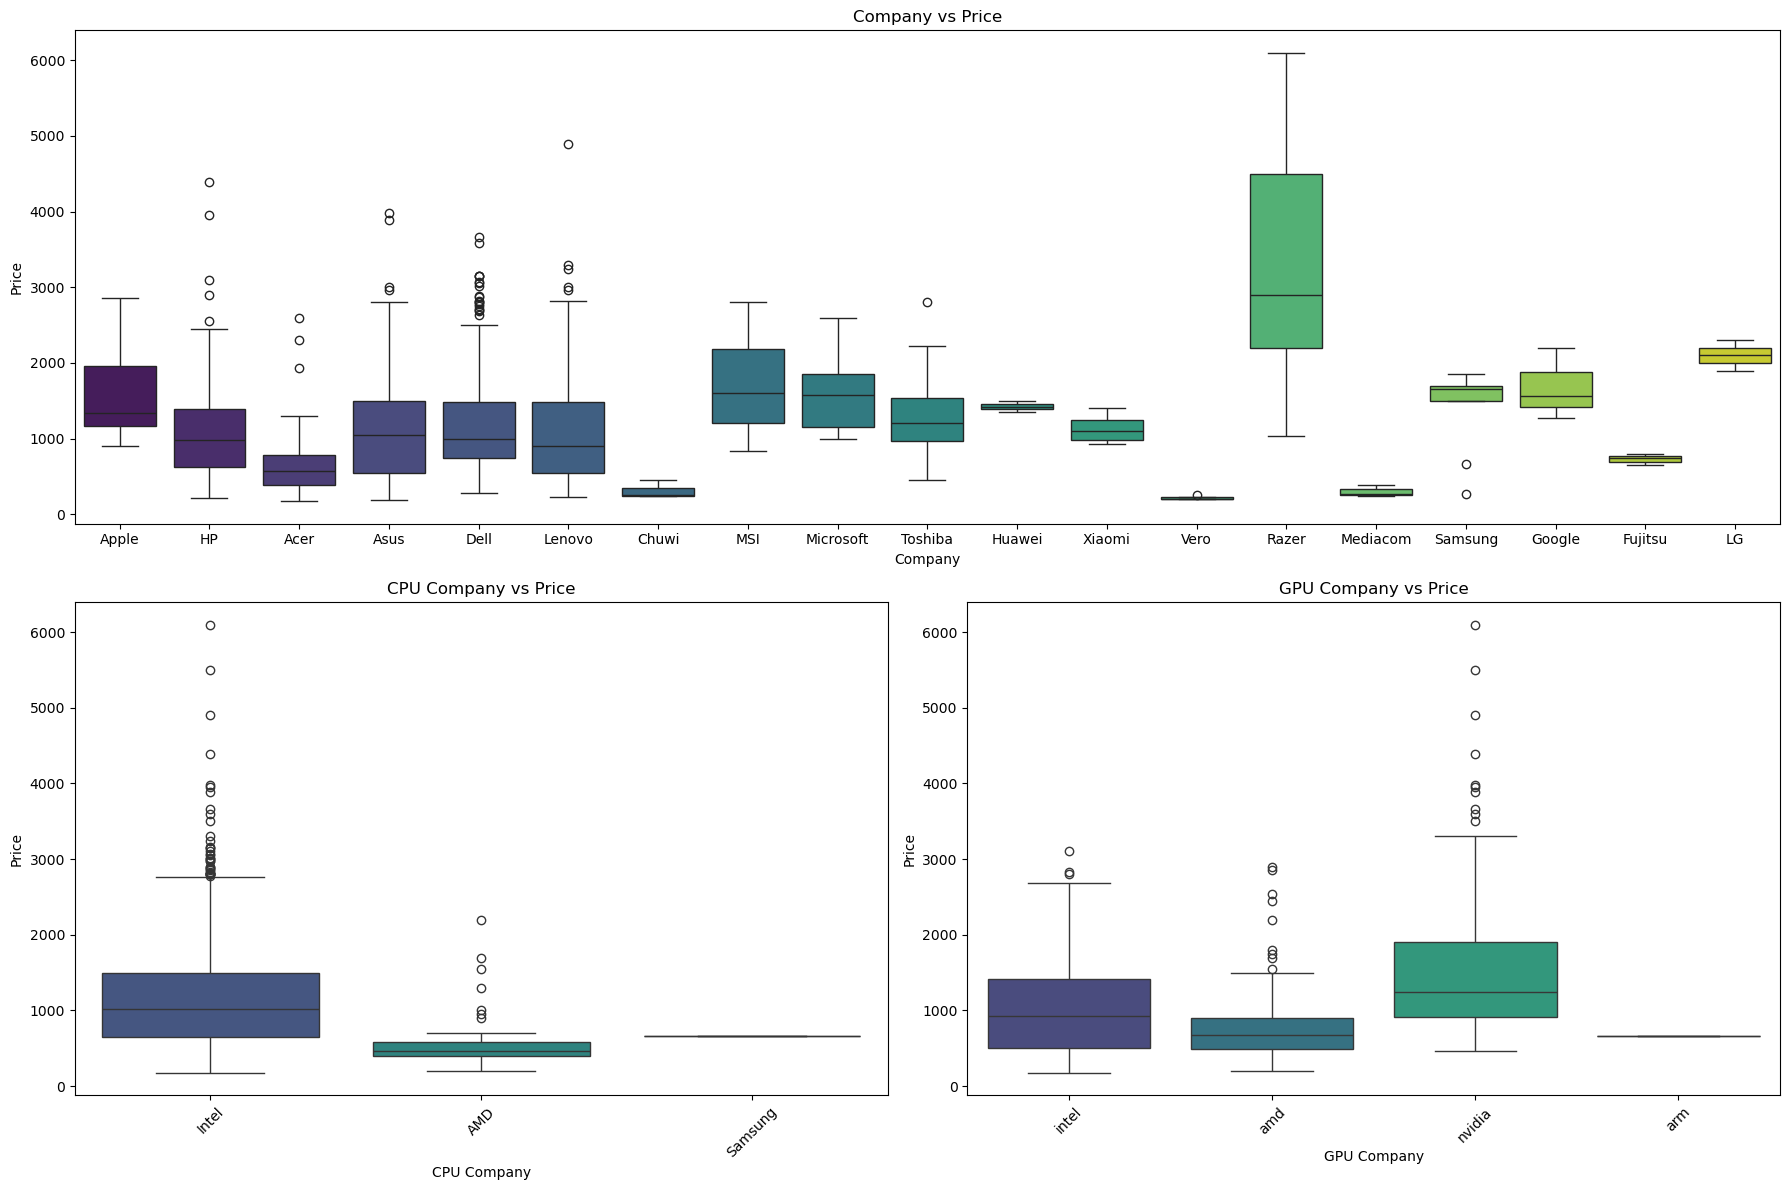

In [43]:
# Vẽ box plot giữa các hãng (Company), Hãng CPU (CPU_Company), Hãng GPU(GPU_Company) với giá (Price_euros) để thấy sự phân bố các hãng theo từng mức giá
from matplotlib.gridspec import GridSpec
plt.figure(figsize=(18, 12))
gs = GridSpec(2, 2, height_ratios=[1, 1])

ax0 = plt.subplot(gs[0, :])
sns.boxplot(data=df, x='Company', y='Price_euros', hue='Company', palette='viridis')
plt.title('Company vs Price')
plt.xlabel('Company')
plt.ylabel('Price')
plt.legend([], [], frameon=False)  # Ẩn legend

ax1 = plt.subplot(gs[1, 0])
sns.boxplot(data=df, x='CPU_company', y='Price_euros', hue='CPU_company', palette='viridis')
plt.title('CPU Company vs Price')
plt.xlabel('CPU Company')
plt.ylabel('Price')
plt.xticks(rotation=45)
plt.legend([], [], frameon=False)

ax2 = plt.subplot(gs[1, 1])
sns.boxplot(data=df, x='GPU_company', y='Price_euros', hue='GPU_company', palette='viridis')
plt.title('GPU Company vs Price')
plt.xlabel('GPU Company')
plt.ylabel('Price')
plt.xticks(rotation=45)
plt.legend([], [], frameon=False)

plt.tight_layout()
plt.show()

Company vs Price:
- Razer: Có giá trung bình cao nhất, vượt xa các hãng khác, phản ánh chiến lược tập trung vào laptop gaming cao cấp, với phần lớn sản phẩm nằm ở phân khúc giá trên 2000 euros.
- Các hãng khác như HP, Dell, Asus, Apple, Lenovo: Phân khúc giá trải dài từ thấp đến trung bình, thường tập trung trong khoảng dưới 2000 euros.
Đây là các hãng phổ biến với nhiều dòng sản phẩm phù hợp các mức giá khác nhau.
- Các hãng như LG, Google, MSI, và Microsoft: Có một số sản phẩm ở phân khúc giá cao, thường gắn liền với laptop gaming hoặc dòng sản phẩm cao cấp.
- Hãng giá thấp còn lại Chuwi, Mediacom: Chủ yếu tập trung ở mức giá thấp dưới 1000 euros, phù hợp với người dùng tìm kiếm laptop giá rẻ.

Nhận xét tổng quan: Hãng laptop ảnh hưởng đáng kể đến giá cả, với Apple dẫn đầu về giá trị thương hiệu và chiến lược sản phẩm cao cấp.

CPU Company vs Price:
- Intel: Các sản phẩm sử dụng CPU Intel chiếm phần lớn dữ liệu, với mức giá trải dài từ thấp đến cao, đặc biệt là các sản phẩm cao cấp trên 4000 euros.
- AMD: Laptop sử dụng CPU AMD có mức giá chủ yếu nằm trong phân khúc trung bình, từ khoảng 500 đến 2000 euros.
- Samsung: Số lượng laptop sử dụng CPU Samsung rất ít, và mức giá chủ yếu ở phân khúc thấp.

Nhận xét tổng quan: Hãng CPU có tác động tương đối đến giá, với Intel phổ biến ở các dòng cao cấp, trong khi AMD tập trung vào phân khúc trung bình.

GPU Company vs Price:
- Nvidia: Các sản phẩm sử dụng GPU Nvidia chiếm phần lớn ở phân khúc giá cao, từ 2000 đến 6000 euros.
- Intel: Laptop dùng GPU Intel phổ biến trong phân khúc giá trung bình, chủ yếu dưới 2000 euros.
- AMD: GPU của AMD xuất hiện ở cả phân khúc trung bình và cao cấp, nhưng ít phổ biến hơn Nvidia.
- ARM: Laptop dùng GPU ARM rất ít, nằm ở phân khúc giá thấp, phản ánh sự tập trung vào các thiết bị tiết kiệm năng lượng.

Nhận xét tổng quan: Nvidia chiếm ưu thế trong phân khúc giá cao, trong khi Intel tập trung vào các sản phẩm phổ thông. AMD ở giữa, với một số dòng cạnh tranh ở cả phân khúc trung bình và cao cấp.

#### c. Kết luận (trả lời câu hỏi) <a id="iv1c"></a>
1. Mỗi đặc trưng ảnh hưởng đến giá laptop như thế nào?

Đặc trưng ảnh hưởng rất lớn:
- RAM: Có mối tương quan dương mạnh nhất và là yếu tố quan trọng nhất trong việc định giá laptop, vì dung lượng RAM cao cải thiện hiệu năng trực tiếp.
- CPU_Rank: Xếp hạng CPU có ảnh hưởng lớn đến giá, phản ánh sức mạnh và khả năng xử lý của CPU.
- GPU_Rank: Xếp hạng GPU cũng đóng vai trò quan trọng, đặc biệt trong các dòng laptop cao cấp phục vụ đồ họa hoặc gaming.
- ScreenW và ScreenH: Độ phân giải màn hình có ảnh hưởng mạnh, đặc biệt đối với các laptop cao cấp.

Đặc trưng ảnh hưởng vừa phải:
- CPU_freq: Tần số CPU có mối quan hệ tuyến tính tương đối với giá, nhưng tác động không lớn bằng RAM hay CPU_Rank.
- Weight (Trọng lượng): Laptop nhẹ hơn thường có giá cao hơn, do vật liệu và thiết kế, nhưng ảnh hưởng không quá mạnh.
- PrimaryStorage và SecondaryStorage: Dung lượng lưu trữ càng lớn lớn giá cũng càng tăng, nhưng không phải yếu tố chính quyết định.

Đặc trưng ảnh hưởng nhẹ hoặc không đáng kể:
- Touchscreen, IPS, RetinaDisplay: Các tính năng bổ sung này tạo sự khác biệt nhỏ trong giá, chủ yếu tập trung ở phân khúc cao cấp.
- Inches, SecondaryStorage: Có tác động yếu, chỉ ảnh hưởng nhẹ đến giá laptop.

Hãng sản xuất laptop:
- Hãng sản xuất có tác động đáng kể, với các thương hiệu cao cấp như Apple, Razer dẫn đầu về giá, trong khi các hãng phổ thông như Acer, Lenovo tập trung vào phân khúc giá thấp hơn.

Hãng CPU:
- Intel phổ biến trong các laptop cao cấp, trong khi AMD tập trung vào phân khúc trung bình với giá hợp lý.

Hãng GPU:
- Nvidia chiếm ưu thế ở phân khúc giá cao, còn Intel phổ biến ở dòng phổ thông, với AMD đứng ở giữa.

2. Đặc trưng nào ảnh hưởng lớn nhất trong việc định giá laptop?
- RAM là đặc trưng ảnh hưởng lớn nhất, vì nó liên quan trực tiếp đến hiệu năng của laptop, thể hiện rõ ràng qua cả mô hình huấn luyện và phân tích tương quan.
- Tiếp theo là CPU_Rank và GPU_Rank, hai yếu tố này ảnh hưởng đáng kể do quyết định hiệu suất xử lý và khả năng đồ họa.
- Các yếu tố khác như độ phân giải màn hình (ScreenW, ScreenH) và trọng lượng (Weight) cũng đóng vai trò quan trọng nhưng ở mức độ thấp hơn so với RAM, CPU, và GPU.

### 2. Câu hỏi 2 <a id="iv2"></a>

Xu hướng cấu hình của laptop là gì?  

Hiện nay, xu hướng cấu hình của laptop chú trọng vào việc đáp ứng nhu cầu đa dạng của người tiêu dùng, từ công việc, học tập đến giải trí. Các tiêu chí quan trọng khi chọn mua laptop bao gồm mục đích sử dụng, thương hiệu, bộ vi xử lý, trọng lượng, dung lượng RAM và độ phân giải màn hình,... Điều này giúp người tiêu dùng hiểu rõ và đưa ra quyết định thông minh, chọn được sản phẩm phù hợp nhất với nhu cầu công việc, học tập hoặc giải trí của mình.

Để trả lời câu hỏi này, nhóm sẽ tiến hành lần lượt trả lời các câu hỏi sau:
  - Thương hiệu nào phổ biến nhất?
  - Loại laptop được người dùng ưa chuộng nhất?
  - Các hãng sản xuất CPU và GPU nào được ưa chuộng?
  - Dung lượng RAM phổ biến nhất là gì?
  - Trọng lượng laptop phân bố như thế nào?
  - Độ phân giải màn hình phổ biến nhất là?

Từ phân tích về xu hướng, nhóm sẽ đưa ra vài gợi ý cho người dùng trong việc chọn laptop.


#### a. Thương hiệu nào phổ biến nhất? <a id="iv2a"></a>

Thương hiệu phổ biến cho thấy mức độ tin cậy và lựa chọn hàng đầu của người tiêu dùng. Việc phân tích thương hiệu phổ biến sẽ giúp nắm bắt xu hướng tiêu dùng của người dùng.  
Đầu tiên, ta tìm hiểu hiện nay có các thương hiệu phổ biến nào?

In [44]:
df['Company'].unique()

array(['Apple', 'HP', 'Acer', 'Asus', 'Dell', 'Lenovo', 'Chuwi', 'MSI',
       'Microsoft', 'Toshiba', 'Huawei', 'Xiaomi', 'Vero', 'Razer',
       'Mediacom', 'Samsung', 'Google', 'Fujitsu', 'LG'], dtype=object)

Như vậy, có 19 thương hiệu phổ biến, bao gồm:
- Apple
- HP
- Acer
- Asus
- Dell
- Lenovo
- Chuwi
- MSI
- Microsoft
- Toshiba
- Huawei
- Xiaomi
- Vero
- Razer
- Mediacom
- Samsung
- Google
- Fujitsu
- LG

Để biết được thương hiệu nào phổ biết nhất, ta tiến hành đếm số sản phẩm của từng thương hiệu.

In [45]:
# Đếm số lượng sản phẩm từng thương hiệu
brand_counts = df['Company'].value_counts()
brand_counts

Dell         291
Lenovo       289
HP           267
Asus         152
Acer         101
MSI           54
Toshiba       48
Apple         21
Samsung        9
Razer          7
Mediacom       7
Microsoft      6
Xiaomi         4
Vero           4
Chuwi          3
Google         3
Fujitsu        3
LG             3
Huawei         2
Name: Company, dtype: int64

Từ kết quả, ta thấy các thương hiệu **Dell**, **Lenovo** và **HP** có số lượng sản phẩm khá lớn. Và **Dell** là thương hiệu phổ biến nhất với số lượng sản phẩm là **291**.

Ta sẽ trực quan bằng biểu đồ để có cái nhìn tổng quan hơn.

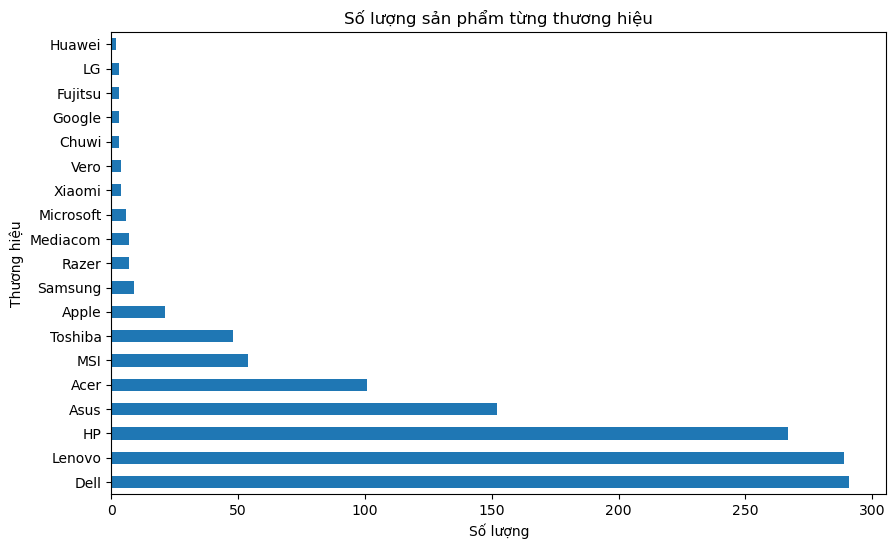

In [46]:
# Vẽ biểu đồ số lượng sản phẩm từng thương hiệu
plt.figure(figsize=(10, 6))
brand_counts.plot(kind='barh')
plt.title('Số lượng sản phẩm từng thương hiệu')
plt.xlabel('Số lượng')
plt.ylabel('Thương hiệu')
plt.show()

Ta có thể rút được vài nhận xét:
- Có nhiều thương hiệu khác nhau tham gia vào thị trường này, cho thấy sự cạnh tranh khá cao.
- Các thương hiệu có sự khác biệt rõ rệt về số lượng sản phẩm, cho thấy sự phân hóa mạnh mẽ.
- Thương hiệu phổ biến nhất là **Dell**, kế đến là **Lenovo**, **HP**

#### b. Loại laptop được người dùng ưa chuộng nhất? <a id="iv2b"></a>

Loại laptop sẽ phản ánh nhu cầu sử dụng cụ thể của người tiêu dùng. Vì vậy, việc xác định loại laptop ưa chuộng giúp ta nhận diện  được xu hướng tiêu dùng và mục đích sử dụng chính của người mua.  
Đầu tiên, ta xem trên thị trường có những loại laptop nào?

In [47]:
df['TypeName'].unique()

array(['Ultrabook', 'Notebook', 'Netbook', 'Gaming', '2 in 1 Convertible',
       'Workstation'], dtype=object)

Như vậy, trên thị trường có 6 loại laptop:
- **Ultrabook**: Laptop mỏng nhẹ, pin lâu, dành cho văn phòng và di chuyển.
- **Notebook**: Laptop tiêu chuẩn, cân bằng hiệu năng và giá cả.
- **Netbook**: Laptop nhỏ gọn, cấu hình thấp, phù hợp nhu cầu cơ bản.
- **Gaming**: Laptop hiệu năng cao, chuyên chơi game và đồ họa.
- **2 in 1 Convertible**: Laptop lai, có thể gập thành tablet, đa năng.
- **WorkStation**: Laptop cấu hình cực mạnh, dành cho công việc chuyên môn cao.

Tương tự, ta sẽ tính toán số lượng sản phẩm ứng với từng loại Laptop.

In [48]:
type_counts = df['TypeName'].value_counts()
type_counts

Notebook              707
Gaming                205
Ultrabook             194
2 in 1 Convertible    117
Workstation            28
Netbook                23
Name: TypeName, dtype: int64

Để dễ quan sát, ta vẽ biểu đồ bar chart đễ trực quan.

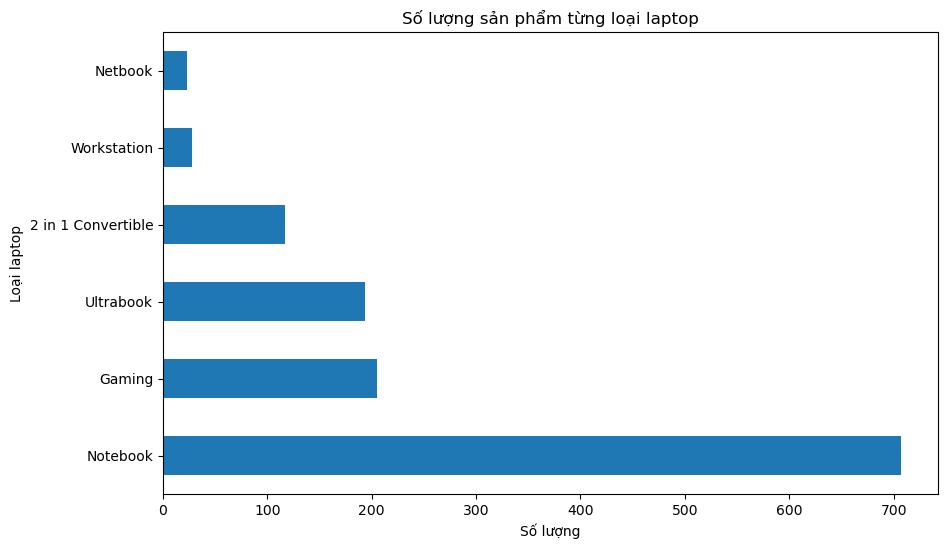

In [49]:
# Biểu đồ số lượng sản phẩm từng loại laptop
plt.figure(figsize=(10, 6))
type_counts.plot(kind='barh')
plt.title('Số lượng sản phẩm từng loại laptop')
plt.xlabel('Số lượng')
plt.ylabel('Loại laptop')
plt.show()

Từ biểu đồ, ta có nhận xét:
- Laptop Notebook chiếm ưu thế: Loại laptop này có số lượng sản phẩm bán ra lớn nhất, vượt trội so với các loại khác. Có vẻ người dùng khá ưa chuộng loại laptop này.
- Các loại laptop khác có số lượng vừa phải, không vượt trội như `Notebook', có thể do chúng chỉ phục vụ cho một số đối tượng người dùng cụ thể.
- Nhìn chung, thị trường laptop cũng khá đa dạng, có nhiều loại laptop khác nhau.

#### c. Các hãng sản xuất CPU và GPU nào được ưa chuộng? <a id="iv2c"></a>

CPU và GPU là yếu tố then chốt quyết định hiệu năng, ảnh hưởng trực tiếp đến lựa chọn của người tiêu dùng. Vì thế, ta sẽ tìm hiểu xem, các hãng sản xuất nào đang được người dùng ưu chuộng.  
Đầu tiên, ta xem trên thị trường có những hãng sản xuất CPU và GPU nào.

In [50]:
df['CPU_company'].unique()

array(['Intel', 'AMD', 'Samsung'], dtype=object)

In [51]:
df['GPU_company'].unique()

array(['intel', 'amd', 'nvidia', 'arm'], dtype=object)

Những hãng sản xuất CPU và GPU hiện nay không nhiều:
- **Intel**: Sản xuất cả CPU và GPU.
- **AMD**: Sản xuất cả CPU và GPU.
- **Nvidia**: Sản xuất GPU.
- **ARM**: Sản xuất GPU.

Tiếp theo, ta cần tính toán số lượng latop sử dụng CPU/GPU của từng hãng sản xuất. Rồi vẽ biểu đồ trực quan.

In [52]:
cpu_counts = df['CPU_company'].value_counts()
cpu_counts

Intel      1213
AMD          60
Samsung       1
Name: CPU_company, dtype: int64

Có vẻ số sản phẩm dùng CPU **Intel** khá áp đảo.

In [53]:
gpu_counts = df['GPU_company'].value_counts()
gpu_counts

intel     704
nvidia    395
amd       174
arm         1
Name: GPU_company, dtype: int64

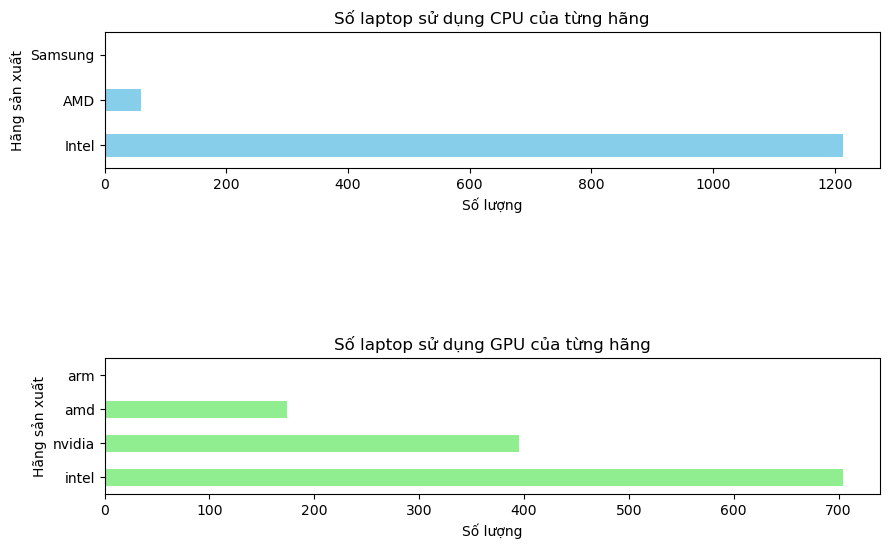

In [54]:
# Visualize the results
plt.figure(figsize=(10, 6))

plt.subplot(3, 1, 1)
cpu_counts.plot(kind='barh', color='skyblue')
plt.title('Số laptop sử dụng CPU của từng hãng')
plt.xlabel('Số lượng')
plt.ylabel('Hãng sản xuất')

plt.subplot(3, 1, 3)
gpu_counts.plot(kind='barh', color='lightgreen')
plt.title('Số laptop sử dụng GPU của từng hãng')
plt.xlabel('Số lượng')
plt.ylabel('Hãng sản xuất')
plt.show()

Ta có nhận xét sau:
- Bộ xử lí của  Intel rất được ưa chuộng, phần lớn các laptop trên thị trường đều dùng trang bị CPU VÀ GPU của Intel. Có thể nói Intel đang dẫn đầu trong lĩnh vực này.
- AMD, Nvidia tuy không bằng Intel, những cũng chiếm thị phần đáng kể.
- Samsung cũng có mặt trong sản xuất CPU nhưng quy mô rất nhỏ.
- ARM có mặt trong sản xuất GPU, nhưng quy mô cũng rất nhỏ.  

#### d. Dung lượng RAM phổ biến nhất là gì? <a id="iv2d"></a>

Dung lượng RAM ảnh hưởng đến khả năng đáp ứng các tác vụ thường ngày, quyết định trải nghiệm người dùng. Việc phân tích dung lượng RAM sẽ giúp chúng ta hiểu rõ nhu cầu của người tiêu dùng đối với các dòng sản phẩm.  
Đầu tiên, ta sẽ tìm hiểu các dung lượng RAM đang phổ biến.

In [55]:
ram_counts = df['Ram'].value_counts()
ram_counts

8     612
4     367
16    198
6      35
12     25
32     17
2      16
24      3
64      1
Name: Ram, dtype: int64

Từ kết quả, ta thấy được dung lượng RAM laptop khá đa dạng, thấp nhất là 2GB, trải dài tới cao nhất là 64GB.  
Tiếp theo, ta sẽ vẽ biểu đồ trực quan để có cái nhìn tổng quan hơn.

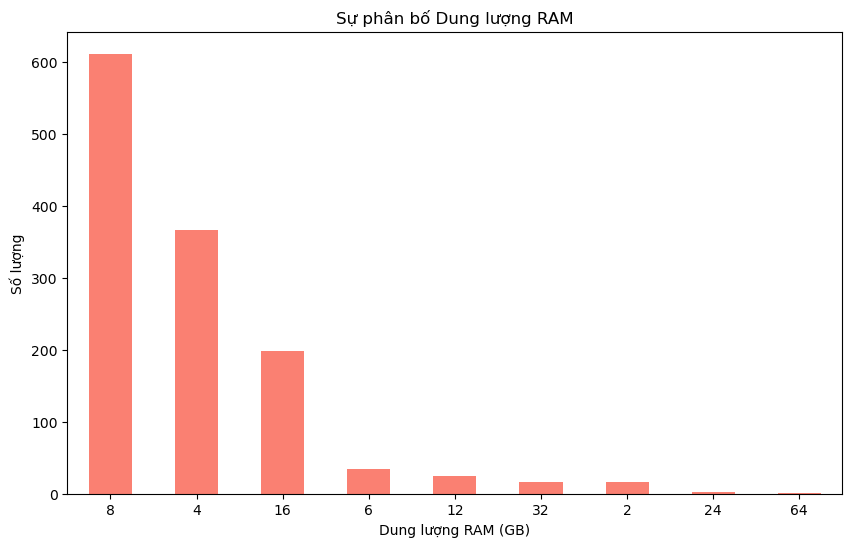

In [56]:
# Trực quan sự phân bố của RAM
plt.figure(figsize=(10, 6))
ram_counts.plot(kind='bar', color='salmon')
plt.title('Sự phân bố Dung lượng RAM')
plt.xlabel('Dung lượng RAM (GB)')
plt.xticks(rotation=0)
plt.ylabel('Số lượng')
plt.show()

Dựa trên biểu đồ, ta có thể rút ra một số nhận xét sau:
- Dung lượng RAM 8GB là phổ biến nhất, chiếm tỷ lệ cao nhất trong tổng số các loại dung lượng RAM được khảo sát. Điều này cho thấy rằng, trong thời gian gần đây, 8GB RAM đã trở thành mức RAM tiêu chuẩn.
- Mặc dù không bằng 8GB, dung lượng RAM 4GB vẫn được sử dụng khá phổ biến.
- Các dung lượng RAM khác như 16GB, 6GB, 12GB, 32GB, 2GB, 24GB, 64GB có số lượng máy sử dụng ít hơn rất nhiều so với 8GB và 4GB. Có thể do chúng được sử dụng cho thiết bị chuyên dụng hoặc cấu hình cao,...

#### e. Trọng lượng laptop phân bố như thế nào? <a id="iv2e"></a>

Trả lời câu hỏi này sẽ cung cấp thông tin về các loại laptop phổ biến theo trọng lượng, từ đó hiểu được xu hướng lựa chọn của người tiêu dùng. Ví dụ: Người dùng có ưu tiên laptop nhẹ để di chuyển hay laptop nặng để làm việc hiệu năng cao.  

Để thuận tiện trả lời, chúng ta sẽ chia trọng lượng laptop thành 3 mức:
- Nhẹ (Light): 1 kg đến 1,5 kg 
- Trung bình (Medium): 1,5 kg đến 2,5 kg
- Nặng (Heavy): Từ 2,5 kg trở lên

Ta sẽ thêm cột `Weight_catagory` để phân loại trọng lượng laptop

In [57]:
# Hàm phân loại trọng lượng laptop
def classify_weight(weight):
    if weight < 1.5:
        return 'Light'
    elif 1.5 <= weight < 2.5:
        return 'Medium'
    else:
        return 'Heavy'

# Áp dụng phân loại
df['Weight_catagory'] = df['Weight'].apply(classify_weight)

Ta xem thử vài dòng đầu để kiểm tra.

In [58]:
df[['Weight', 'Weight_catagory']].head()

,Weight,Weight_catagory
0,1.37,Light
1,1.34,Light
2,1.86,Medium
3,1.83,Medium
4,1.37,Light


Như vậy, chúng ta đã phân loại thành công.  

Tiếp theo, chúng ta sẽ tính toán số lượng laptop ở từng mức và vẽ biểu đồ trực quan.

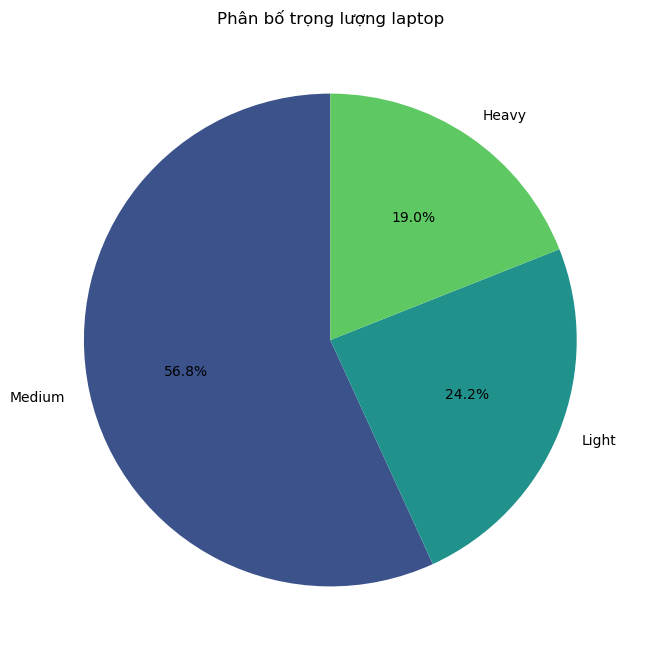

In [59]:
# Trực quan
weight_counts = df['Weight_catagory'].value_counts()

plt.figure(figsize=(8, 8))
plt.pie(
    weight_counts, 
    labels=weight_counts.index,  # type: ignore
    autopct='%1.1f%%', 
    startangle=90, 
    colors=sns.color_palette('viridis', len(weight_counts))
)
plt.title('Phân bố trọng lượng laptop')
plt.show()

Từ biểu đồ, ta có thể nhận xét:
- Số lượng laptop có trọng lượng trung bình chiếm tỷ lệ cao nhất, cho thấy người dùng thường ưu tiên các mẫu laptop vừa phải, không quá nặng để di chuyển.
- Số lượng laptop có trọng lượng nhẹ và nặng ở mức trung bình, có thể chúng chỉ phù hợp với những người dùng có nhu cầu đặc biệt, hay phù hợp với sở thích cá nhân,..

#### f. Độ phân giải màn hình phổ biến nhất là? <a id="iv2f"></a>

Độ phân giải màn hình là chỉ số cho biết số lượng các điểm ảnh (pixel) trên màn hình, được thể hiện bằng phép nhân giữa số điểm ảnh của hàng và cột tương ứng. Độ phân giải càng cao cho khả năng hiển thị hình ảnh càng sắc nét và trung thực (Với cùng kích thước màn hình).   
Ví dụ: 1920x1080 là 1 độ phân giải màn hình

Hai cột liên quan đến độ phân giải màn hình là `ScreenW` và `ScreenH`. Ta sẽ xem qua nội dung hai cột này.

In [60]:
df[['ScreenW', 'ScreenH']].head(5)

,ScreenW,ScreenH
0,2560,1600
1,1440,900
2,1920,1080
3,2880,1800
4,2560,1600


Để phân tích, chúng ta sẽ nối giá trị hai cột này bằng `x`. Ví dụ: ScreenW: 2560, ScreenH: 1600 sẽ là 2560x1600.  
Kết quả sẽ được lưu vào `ScreenResolution`

In [61]:
# Kết hợp 'ScreenW',  'ScreenH' lưu vào 'ScreenResolution'
df['ScreenResolution'] = df['ScreenW'].astype(str) + 'x' + df['ScreenH'].astype(str)

Ta kiểm tra thử 5 dòng đầu.

In [62]:
df[['ScreenW', 'ScreenH', 'ScreenResolution']].head(5)

,ScreenW,ScreenH,ScreenResolution
0,2560,1600,2560x1600
1,1440,900,1440x900
2,1920,1080,1920x1080
3,2880,1800,2880x1800
4,2560,1600,2560x1600


Như vậy, ta đã xử lí xong.  

Bây giờ, chúng ta sẽ vẽ biểu đồ để xem `Độ phân giải màn hình` phân bố ra sao.

C:\Users\Admin\AppData\Local\Temp\ipykernel_18904\3912111484.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y='ScreenResolution', data=df, order=df['ScreenResolution'].value_counts().index, palette='viridis')


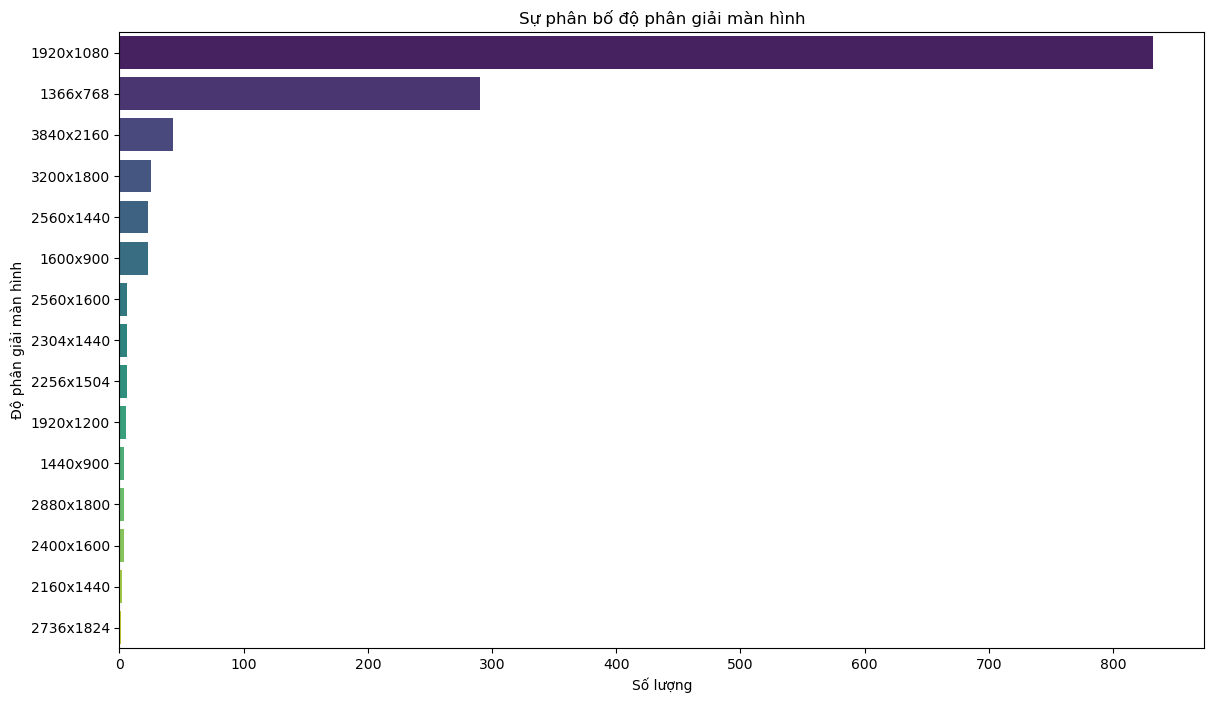

In [63]:
# Trực quan
plt.figure(figsize=(14, 8))
sns.countplot(y='ScreenResolution', data=df, order=df['ScreenResolution'].value_counts().index, palette='viridis')
plt.title('Sự phân bố độ phân giải màn hình')
plt.xlabel('Số lượng')
plt.ylabel('Độ phân giải màn hình')
plt.show()

Từ biểu đồ, ta có thể nhận xét:
- Độ phân giải 1920x1080 (Full HD) là phổ biến nhất, chiếm số lượng lớn các thiết bị. Điều này cho thấy đa số người dùng đang ưu tiên độ phân giải này.
- Các độ phân giải khác như 1366x768, 3840x2160 (4K) cũng có số lượng đáng kể, tuy nhiên không bằng Full HD.

**Kết luận**:
Để chọn laptop phù hơp với bản thân, người dùng có thể :
1. Chọn theo thương hiệu:
   - Các thương hiệu như về **Dell**, **Lenovo**, **HP** đều là những thương hiệu phổ biển.
   - Người dùng có thể cân nhắc chọn 3 thương hiệu trên nếu không có yêu cầu đặc biệt.
2. Chọn theo loại laptop:
   - Ultrabook: Mỏng nhẹ, pin lâu, dành cho người hay di chuyển hoặc làm việc văn phòng.
   - Gaming Laptop: Cấu hình mạnh, chuyên chơi game hoặc làm đồ họa.
   - Workstation: Hiệu năng cao, phục vụ công việc chuyên sâu như thiết kế 3D hay lập trình.
   - Notebook: Lựa chọn phổ biến, cân bằng giữa hiệu năng và giá cả, phù hợp với nhu cầu hàng ngày.
   - Netbook: Rất nhỏ gọn, cấu hình thấp, dành cho nhu cầu cơ bản như lướt web, xem video.
   - 2-in-1 Convertible: Vừa là laptop, vừa là tablet, linh hoạt trong sử dụng.
3. Chọn theo cấu hình:
   - CPU/GPU người dùng có thể lựa chọn tùy thích.
   - Dung lượng RAM:
      - Nếu chỉ dùng các tác vụ cơ bản: RAM 2GB, 4GB là vừa đủ
      - Có như cầu chơi game tầm trung, xử lí tác vụ không quá nặng có thể cân nhắc dung lượng RAM 8GB, 16GB.
      - Đối với các như cầu cao hơn, chọn laptop có dung lượng RAM 32GB, thậm chỉs là 64GB.
4. Chọn theo trọng lượng:
   - Người di chuyển nhiều: có thể chọn laptop nhẹ (1-1.5kg)
   - Người làm việc cố định: có thể chọn các trọng lượng laptop tùy theo sở thích: 1-1.5kg, 1.5-2kg hay >2.5kg
5. Chọn theo độ phân giải màn hình:
   - Full HD (1920x1080): Phù hợp với đa số người dùng nhờ chất lượng hình ảnh rõ nét, giá hợp lý.
   - 4K (3840x2160): Phù hợp cho người làm thiết kế đồ họa hoặc chỉnh sửa video chuyên nghiệp.
   - Các độ phân giải khác người dùng có thể tùy ý lựa chọn dựa vào như cầu cụ thể của bản thân.

### 3. Câu hỏi 3 <a id="iv3"></a>

Với mỗi loại Laptop, cấu hình đặc trưng của từng loại là gì? Phân phối giá cả ra sao?

- Lợi ích khi trả lời câu hỏi: Người tiêu dùng có thể cảm nhận rõ hơn đặc trưng của từng loại laptop (Netbook, Notebook, Ultrabook, Gaming, Workstation, Converitble) là gì? Từ đó có thể chọn được 1 loại laptop phù hợp cho riêng bản thân.

In [64]:
# Reset dataframe cho câu 3
df = pd.read_csv("./Dataset/laptop_price_cleaned.csv", encoding='ISO-8859-1')

Với laptop `2 in 1 Convertible`: Đây là loại laptop có thể vừa sử dụng như 1 table hoặc laptop. Ta có thể thấy được loại laptop này bắt bụôc phải sử dụng màn hình cảm ứng. 

In [65]:
df[(df['TypeName'] == '2 in 1 Convertible') & (df['Touchscreen'] == 'No')]

,Company,Product,TypeName,Inches,Ram,OpSys,Weight,Price_euros,Screen,ScreenW,...,RetinaDisplay,CPU_company,CPU_freq,CPU_model,PrimaryStorage,SecondaryStorage,PrimaryStorageType,SecondaryStorageType,GPU_company,GPU_model
221,Lenovo,Yoga 520-14IKB,2 in 1 Convertible,14,8,Windows 10,1.74,899.0,Full HD,1920,...,No,Intel,1.6,Core i5 8250U,256,0,SSD,No,Intel,UHD Graphics 620
952,Asus,Chromebook Flip,2 in 1 Convertible,12,8,Chrome OS,1.20,1159.0,Full HD,1920,...,No,Intel,1.2,Core M M7-6Y75,64,0,Flash Storage,No,Intel,HD Graphics 515


Sau khi kiểm tra thì có 2 trường hợp đặc trưng Touchscreen = No. Ta sẽ tiến hành chỉnh sửa 2 trường hợp này thành Yes.

In [66]:
df.loc[(df['TypeName'] == '2 in 1 Convertible') & (df['Touchscreen'] == 'No'), 'Touchscreen'] = 'Yes'

#### Với mỗi laptop, ta sẽ quan tâm đến những thành phần chính: Hãng, Màn hình, CPU, Ram, ổ lưu trữ, GPU, Khối lượng, Giá. Mỗi đặc trưng sẽ được lấy ra `mode` hoặc trung bình tùy theo tính chất của đặc trưng đó (là numerical hay là categorical). 

Ta sẽ tiến hành các bước:
- **B1**: Định nghĩa hàm `mode` để lấy ra giá trị xuất hiện nhiều nhất.
- **B2**: Gom nhóm theo loại laptop (TypeName).
- **B3**: Áp dụng các hàm `mean` hoặc hàm tự viết để lấy ra `mode` lên các đặc trưng sao cho phù hợp.

In [67]:
# Return mode values
def mode(series):
    return series.mode()[0] 

# Apply function to each feature.
configs = df.groupby('TypeName').agg({
    'Ram': mode,
    'Weight': 'mean',
    'Inches': mode,
    'Screen': mode,
    'Touchscreen': mode,
    'CPU_company': mode,
    'CPU_freq': 'mean',
    'PrimaryStorage': mode,
    'PrimaryStorageType': mode,
    'SecondaryStorage': mode,
    'SecondaryStorageType': mode,
    'GPU_company': mode,
}).reset_index()

configs

,TypeName,Ram,Weight,Inches,Screen,Touchscreen,CPU_company,CPU_freq,PrimaryStorage,PrimaryStorageType,SecondaryStorage,SecondaryStorageType,GPU_company
0,2 in 1 Convertible,8,1.546504,13,Full HD,Yes,Intel,2.115897,256,SSD,0,No,Intel
1,Gaming,16,2.949761,15,Full HD,No,Intel,2.722439,256,SSD,1024,HDD,Nvidia
2,Netbook,4,1.317826,11,Standard,No,Intel,1.675652,32,SSD,0,No,Intel
3,Notebook,4,2.055615,15,Full HD,No,Intel,2.214851,256,SSD,0,No,Intel
4,Ultrabook,8,1.344680,13,Full HD,No,Intel,2.301546,256,SSD,0,No,Intel
5,Workstation,8,2.483214,15,Full HD,No,Intel,2.750000,256,SSD,0,No,Nvidia


Tổng quan kết quả ta có được:
- Intel là hãng CPU chiếm phần lớn trong số các loại laptop.
- SSD là loại ổ cứng lưu trữ được sử dụng nhiều cho bộ nhớ chính của laptop(có lẽ vì tốc độ và giá cả của SSD ngày càng hợp lí).
- 256GB là kích thước tối thiểu để lưu trữ do sự phát triển và chiếm dung lượng của hệ điều hành.

Với mỗi dòng máy:
- Laptop `2 in 1 Convertible`: Đây là dòng máy cao cấp có thể sử dụng như 1 máy tính bảng nên chắc chắn sẽ yêu cầu 1 cấu hình vừa phải.
    - Ram 8GB: Đây là yêu cầu tối thiểu đối với 1 laptop có thể được sử dụng như 1 máy tính bảng.
    - Khối lượng trung bình khá nhẹ 1.5kg
    - Màn hình khá nhỏ 13 inches với độ phân giải Full HD và tất nhiên là sẽ phải yêu cầu có màn hình cảm ứng.
    - Xung nhịp CPU ở mức trung bình là 2.1GHz.
    - Card đồ họa sử dụng chủ yếu là Card đồ họa tích hợp vào main board do Intel sản xuất.
- Laptop `Gaming`: Đây là loại laptop yêu cầu cấu hình phải cao và bắt buộc phải có card đồ họa rời để phù hợp với việc chơi game.
    - Ram 16GB: là yêu cầu tối thiểu để có thể chơi game mượt mà.
    - Khối lượng trung bình rất nặng gần 3kg(bởi vì yêu cầu có hệ thống tản nhiệt cho nên rất nặng).
    - Màn hình lớn 15 inches, độ phân giải Full HD và tất nhiên là không cần thiết phải sử dụng cảm ứng.
    - Xung nhịp CPU trung bình ở mức cao 2.7GHz
    - Có bộ nhớ phụ 1TB HDD để phù hợp cho việc lưu trữ game nặng. 
    - Card đồ họa chắc chắn phải sử dụng card rời để cho việc chơi game mượt mà (Nvidia là hãng GPU nổi tiếng).
- `Netbook`: Kích thước vô cùng nhỏ và thường rất yếu, chỉ cần phục vụ các tác vụ rất nhẹ.
    - Ram 4GB: Yêu cầu tối thiểu hiện nay.
    - Khối lượng trung bình rất nhẹ 1.3kg.
    - Màn hình rất nhỏ chỉ có 11 inches, độ phân giải Standard phù hợp với kích thước màn hình rất nhỏ và không cần cảm ứng.
    - Xung nhịp CPU rất thấp 1.7GHz chỉ đủ phục vụ tác vụ nhẹ.
    - Do không yêu cầu lưu trữ cao nên chỉ sử dụng ổ cứng với kích thước nhỏ 32GB.
    - Card đồ họa tích hợp Intel.
- `Notebook`: Yêu cầu nhẹ và nhỏ gọn với chức năng cơ bản.
    - Ram 4GB vì chỉ cần xử lí các tác vụ cơ bản.
    - Khối lượng trung bình khá nhẹ 2kg.
    - Màn hình lớn 15inches, độ phân giải FullHD và không cần thiết phải sử dụng cảm ứng.
    - Xung nhịp CPU trung bình 2.2GHz đủ để xử lí tác vụ cơ bản.
    - Card đồ họa tích hợp Intel.
- `Ultrabook`: Phiên bản nhỏ gọn hơn của Notebook, nhưng yêu cầu cao hơn.
    - Ram 8GB để xử lí nhiều tác vụ hơn.
    - Khối lượng trung bình rất nhẹ 1.3kg(tương đương với 1 con Netbook nhưng lại có cấu hình cao hơn rất nhiều).
    - Màn hình khá nhỏ 13 inches, độ phân giải FullHD và không cần thiết phải sử dụng cảm ứng.
    - Xung nhịp CPU trung bình 2.3GHz đủ để xử lí tác vụ cơ bản.
    - Card đồ họa tích hợp Intel.
- `Workstation`: Đây là loại máy trạm yêu cầu phải cao hơn so với các loại laptop phổ thông.
    - Ram 8GB để xử lí nhiều tác vụ.
    - Khối lượng trung bình khá nặng 2.5kg.
    - Màn hình lớn 15 inches FullHD, không cần thiết phải sử dụng cảm ứng.
    - Xung nhịp CPU ở mức cao 2.7GHz phù hợp cho việc xử lí được nhiều tác vụ nhanh.
    - Card đồ họa thường phải sử dụng card rời dành cho các công việc kĩ thuật yêu cầu các tác vụ đồ họa (Nvidia).

Đối với giá cả của từng loại laptop

In [68]:
prices = df.groupby('TypeName')['Price_euros'].describe()
prices

,count,mean,std,min,25%,50%,75%,max
TypeName,,,,,,,,
2 in 1 Convertible,117.0,1289.714530,617.436633,275.0,798.010,1199.00,1799.00,2824.0
Gaming,205.0,1731.380634,814.174430,699.0,1169.000,1492.80,2199.00,6099.0
Netbook,23.0,673.382609,592.093391,174.0,269.000,355.00,1066.50,1908.0
Notebook,707.0,788.744781,446.823803,196.0,478.945,695.00,982.50,4899.0
Ultrabook,194.0,1556.676031,484.737332,499.0,1159.775,1499.00,1869.00,3100.0
Workstation,28.0,2281.478929,725.694660,1369.0,1835.750,2028.95,2511.75,4389.0


**Ta có thể rút ra được 1 vài điều:**
- Giá của Notebook rất phải chăng, phù hợp với đại đa số người dùng. Do đó chiếm số lượng rất lớn trong thị trường.
- Giá của Netbook thấp nhất do cấu hình thấp và cũng không được ưa chuộng.
- Đối với dòng sản phẩm cao cấp như Ultrabook và 2 in 1 Convertible thì có giá cả cao hơn nhiều so với 2 loại máy trên.
- Đối với laptop Gaming yêu cầu cao nên giá bán cũng cao lên (có những Laptop gaming có giá cực khủng). Nhưng laptop gaming hiện nay cũng đã trở nên phổ biến, nên có những dòng máy có giá vừa phải cũng đã có thể chơi game mượt mà. Điều này làm cho giá trung bình thấp hơn so với dòng máy trạm.
- Đối với dòng máy trạm yêu cầu cao nhưng sự chênh lệch giá không nhiều cho nên có giá trung bình cao nhất trong số các loại máy kể trên.

**Trực quan thông qua biểu đồ boxplot và cảm nhận rõ hơn được giá cả của từng loại.**

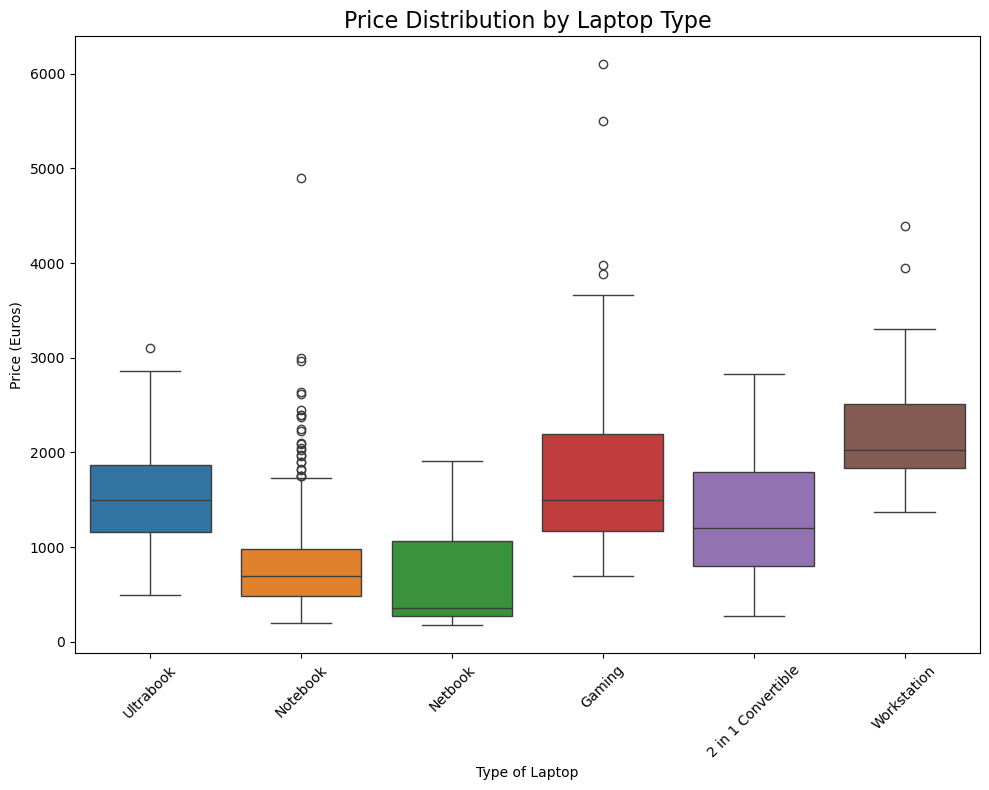

In [69]:
plt.figure(figsize=(10, 8))
sns.boxplot(data=df, x='TypeName', y='Price_euros', hue='TypeName', legend=False)
plt.title("Price Distribution by Laptop Type", fontsize=16)
plt.xlabel("Type of Laptop")
plt.ylabel("Price (Euros)")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

### 4. Câu hỏi 4 (bonus) <a id="iv4"></a>

Với 1 thông tin về cấu hình cho trước, làm sao có thể dự đoán giá của laptop?
- Lợi ích khi trả lời câu hỏi: Người tiêu dùng có thể dự đoán được giá của laptop với thông tin cấu hình ưa thích. Từ đó điều chỉnh sao cho phù hợp với túi tiền.

- Để trả lời câu hỏi này, ta sẽ sử dụng giải thuật đơn giản K-Nearest Neighbors (KNN). Thuật toán sẽ tìm cấu hình tương đồng nhất với cấu hình ưa thích và từ đó dự đoán được giá của cấu hình laptop người tiêu dùng đưa ra.
    - Bước 1: Mã hóa các thuộc tính categorical thành số để nhằm tính toán độ tương đồng (khoảng cách). Để đơn giản ta sẽ sử dụng hàm encoder của thư viện scikit-learn
    - Bước 2: Ta sẽ chia tập thành 2 tập train và test (mục đích là để kiểm tra độ chính xác của dự đoán). Để cho đơn giản ta sẽ sử dụng hàm train_test_split của thư viện scikit-learn.
    - Bước 3: Sử dụng thuật toán KNN. Sau đó kiểm tra độ chính xác bằng các độ đo. Để cho đơn giản, ta sẽ sử dụng thuật toán của thư viên scikit-learn
    - Bước 4: Dự đoán giá của 1 cấu hình ví dụ.
        - Để chuẩn bị cho bước này ta sẽ tiến hành tạo 1 cấu hình mặc định bằng cách lấy mode hoặc mean của các đặc trưng (Vì có thể cấu hình ưa thích không có đầy đủ đặc trưng) ngay từ ban đầu.

In [70]:
# import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.neighbors import KNeighborsRegressor

In [71]:
# Reset dataframe cho câu 4
df = pd.read_csv("./Dataset/laptop_price_cleaned.csv", encoding='ISO-8859-1')

Vì để đề xuất 1 sản phẩm laptop từ 1 cấu hình yêu thích, ta có thể bỏ đi các cột như là tên sản phẩm, hệ điều hành, công ty sản xuất là những cột không cần thiết.

In [72]:
X = df.drop(columns=['Price_euros', 'Product', 'OpSys', 'Company'])
y = df['Price_euros']

Tạo 1 cấu hình mặc định bằng cách lấy `mode` và `mean` từ dữ liệu đầu vào.

In [73]:
categorical_cols = ['TypeName', 'Touchscreen', 'IPSpanel', 'RetinaDisplay', 'PrimaryStorageType', 'SecondaryStorageType', 'CPU_company', 'CPU_model', 'GPU_company', 
                    'GPU_model', 'Screen' , 'Inches', 'Ram', 'ScreenW', 'ScreenH', 'PrimaryStorage', 'SecondaryStorage']
numerical_cols = ['Weight', 'CPU_freq']

default_values = {}
for col in X.columns:
    if col in categorical_cols:
        default_values[col] =  [X[col].mode()[0]]
    elif col in numerical_cols:
        default_values[col] = [X[col].mean()]
default_values

{'TypeName': ['Notebook'],
 'Inches': [15],
 'Ram': [8],
 'Weight': [2.040557299843014],
 'Screen': ['Full HD'],
 'ScreenW': [1920],
 'ScreenH': [1080],
 'Touchscreen': ['No'],
 'IPSpanel': ['No'],
 'RetinaDisplay': ['No'],
 'CPU_company': ['Intel'],
 'CPU_freq': [2.3026687598116173],
 'CPU_model': ['Core i5 7200U'],
 'PrimaryStorage': [256],
 'SecondaryStorage': [0],
 'PrimaryStorageType': ['SSD'],
 'SecondaryStorageType': ['No'],
 'GPU_company': ['Intel'],
 'GPU_model': ['HD Graphics 620']}

In [74]:
# Mã hóa các đặc trưng categorical.
encoders = {}
for col in categorical_cols:
    le = LabelEncoder()
    X[col] = le.fit_transform(X[col])
    encoders[col] = le

In [75]:
# Chia tập train và test theo tỉ lệ 8:2
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [76]:
# Sử dụng thuật toán KNN vớ sẽ lấy i trung bình của dữ liệu gần nhất.
knn = KNeighborsRegressor(n_neighbors=3)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)

In [77]:
# Tính các chỉ số sai số
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)

print(f'MSE = {mse:.2f}')
print(f'RMSE = {rmse:.2f}')

MSE = 108556.08
RMSE = 329.48


-> Có thể thấy được ước lượng khá tốt.

Lấy ra 1 cấu hình ưa thích và sẽ dự đoán giá.

In [78]:
favor_config = pd.DataFrame({
    'TypeName': ['Gaming'],
    'Inches': [15],
    'Ram': [16],
    'Weight': [2.5],
    # 'Screen': ['Full HD'],
    # 'ScreenW': [1920],
    # 'ScreenH': [1080],
    # 'Touchscreen': ['No'],
    # 'IPSpanel': ['Yes'],
    # 'RetinaDisplay': ['No'],
    # 'CPU_company': ['Intel'],
    # 'CPU_freq': [3.2],
    # 'CPU_model': ['Core i5 8250U'],
    'PrimaryStorage': [256],
    'PrimaryStorageType': ['SSD'],
    # 'SecondaryStorage': [0],
    'SecondaryStorageType': ['No'],
    'GPU_company': ['Nvidia'],
    # 'GPU_model': ['GeForce 930MX']
})

In [79]:
# Điền các dữ liệu còn thiếu từ default_config cho favor_config
for col in X.columns:
    if col not in favor_config.columns:
        favor_config[col] = default_values[col]

# Mã hóa lại các thuộc tính categorical.
for col in categorical_cols:
    favor_config[col] = encoders[col].transform(favor_config[col])

# Sắp xếp lại theo thứ tự các đặc trưng để tiến hành dự đoán    
favor_config = favor_config[X.columns]

# Dự đoán giá cho favor_config
predicted_price = knn.predict(favor_config)
print(f"Dự đoán giá cho cấu hình mới: {predicted_price[0]:.2f} Euros")

Dự đoán giá cho cấu hình mới: 1064.00 Euros


Với mức giá này khá hợp lí cho 1 con laptop gaming có card đồ họa rời.

## V. Nhận xét quá trình làm đồ án  <a id="v"></a>

### 1. Thành viên 1  <a id="v1"></a>
Thành viên Nguyễn Tiến Quốc:
- Khó khăn:
    - Không có nhiều kiến thức chuyên sâu về laptop, cấu hình laptop nên khi làm việc với bộ dữ liệu này tiếp cận hơi chậm
    - Có nhiều ý tưởng nhưng phần lớn ý tưởng rất khó triển khai
- Những điều học được:
    - Có thêm nhiều hiểu biết về laptop
    - Học được cách trình bày một bài làm có đầu tư
    - Hiểu biết thêm về ý nghĩa của việc sử dụng biểu đồ để giải quyết vấn đề

### 2. Thành viên 2  <a id="v2"></a>
Thành viên Võ Thành Tâm
- Khó khăn:
  - Ban đầu chưa quen với cách đặt câu hỏi phân tích dữ liệu và mất nhiều thời gian để xác định hướng tiếp cận phù hợp.
  - Việc xử lý và trình bày dữ liệu còn chưa tối ưu, nhiều thiếu xót, dẫn đến tốn nhiều thời gian.
  - Có những ý tưởng phân tích sâu hơn, nhưng không đủ khả năng để thực hiện.
- Những điều học được:
  - Nắm vững hơn cách sử dụng các công cụ phân tích dữ liệu như Pandas, Matplotlib, và Seaborn.
  - Hiểu rõ hơn về cách đặt câu hỏi và sử dụng dữ liệu để trả lời một cách hiệu quả.
  - Có thêm kỹ năng tổ chức và trình bày báo cáo một cách logic và dễ hiểu.

### 3. Thành viên 3  <a id="v3"></a>

Thành viên Nguyễn Trung Quốc:
- Khó khăn:
    - Nghĩ ra được 1 câu hỏi hay và trả lời được thì phải thử nghiệm rất nhiều lần. Có ý tưởng hay nhưng lại vươt quá khả năng của mình. 
    - Việc chọn ra được dataset ưng ý là rất khó. Vì nhóm chỉ mới bắt đầu làm quen nên chưa thực sự tìm được bộ dataset ưng ý.
    - Dữ liệu khá đầy đủ nhưng phải xử lí sao cho dễ nhìn và dễ trực quan hơn.
- Những điều học được:
    - Cẩn thận trong quá trình tìm câu hỏi và trả lời.
    - Nắm vững hơn các công cụ phân tích của Python.

### 4. Ý kiến nhóm  <a id="v4"></a>

Nếu có thêm thời gian thì làm gì?

- Tự cào dữ liệu trên các trang web để có được bộ dữ liệu ưng ý, tự quyết định việc chọn lọc để lấy các cột, đặc trưng theo nhu cầu phân tích của nhóm. Ngoài ra số dòng của bộ dữ liệu này còn quá ít, ở một số hãng CPU như samsung cortex chỉ có 1 sản phẩm,... -> giảm hiệu quả trực quan.
- Huấn luyện và sử dụng thêm các mô hình dự đoán phục vụ cho việc tiếp cận nhiều đối tượng người dùng
- Trong câu hỏi 1, thực hiện xếp hạng chính xác và khách quan hơn cho các nhóm CPU và GPU (dựa vào các nguồn uy tín phổ biến hơn)

Nếu có thời gian, nhóm sẽ tập trung thực hiện các công việc giúp hoàn thiện, nâng cao chất lượng đồ án, từ đó cung cấp thông tin chi tiết và hữu ích hơn cho người tiêu dùng:
 - Nhóm sẽ tìm kiếm thêm dữ liệu từ trang web bán Laptop trực tuyến, diễn đàn công nghệ,... Điều này giúp cập nhật dữ liệu mới nhất và bổ sung các thông tin chi tiết hơn về từng sản phầm.
 - Nhóm sẽ xem xét các yếu tố như xu hướng công nghệ, đánh giá của người dùng từ các trang web đánh giá sản phẩm, hay cân nhất các yếu tố kinh tế. Từ đó, nhóm hiểu rõ hơn về lý do tại sao một số laptop lại phổ biến hơn hoặc có giá cao hơn,...
 - Nhóm sẽ tiến hành các cuộc khảo sát nhỏ để thu thập ý kiến và phản hồi từ người dùng về các tiêu chí quan trọng khi chọn mua laptop, giúp nhóm hiểu rõ hơn về nhu cầu và mong muốn của người tiêu dùng.

 

## Tài liệu tham khảo  <a id="tltk"></a>